In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import optbinning as opt
%matplotlib inline
import pandas as pd
from sklearn.impute import SimpleImputer
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from sklearn.preprocessing import OneHotEncoder, StandardScaler,KBinsDiscretizer, LabelEncoder
from sklearn.impute import SimpleImputer
import statsmodels.api as sm 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import mannwhitneyu , anderson, f_oneway
from scipy.stats import chi2_contingency

(CVXPY) Feb 24 08:48:42 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Feb 24 08:48:42 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')


In [2]:
#"date_mensuelle" interprétée comme des dates, premier colonne du df =notre index
data=pd.read_csv("../data/application_train_vf.csv",parse_dates=["date_mensuelle"], index_col=0)

In [3]:
data['SK_ID_CURR'].value_counts()

SK_ID_CURR
333721    1
368824    1
307850    1
455825    1
295059    1
         ..
430396    1
220807    1
161218    1
290855    1
313239    1
Name: count, Length: 306107, dtype: int64

In [3]:
data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL        OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0      333721       0         Cash loans           M            Y               Y             1          292500.0   1102500.0      32364.0        1102500.0          Family          Working  Secondary / secondary special            Married  House / apartment                    0.018209      -11763           -688             -500.0            -3325          9.0           1               1                0                 1           1           0                Drivers              3.0                     3                            3                   THURSDAY                        9                           0                           0                            0                       0                       0                        0  Transport: type 3           NaN      0.616187      0.651260          0.2938            0.1995                       0.9891              NaN             NaN           0.28         0.2414         0.3750            NaN        0.1346   
1      250254       0         Cash loans           F            N               Y             0          180000.0    270000.0      10179.0         270000.0   Unaccompanied          Working               Higher education            Married       With parents                    0.003122      -12460          -2988            -1576.0             -454          NaN           1               1                0                 1           1           0  High skill tech staff              2.0                     3                            3                   THURSDAY                       10                           0                           0                            0                       0                       0                        0         University           NaN      0.548623      0.413597             NaN               NaN                          NaN              NaN             NaN            NaN            NaN            NaN            NaN           NaN   
2      265071       0         Cash loans           F            Y               N             2           67500.0     80865.0       7546.5          67500.0        Children          Working  Secondary / secondary special            Married  House / apartment                    0.018634      -11118           -907           -10654.0             -425          9.0           1               1                1                 1           0           0               Laborers              4.0                     2                            2                     MONDAY                       10                           0                           0                            0                       0                       0                        0         Government      0.282297      0.582081      0.399676          0.1237            0.0493                       0.9861              NaN             NaN           0.00         0.2759         0.1667            NaN        0.0678   
3      227569       0         Cash loans           F            Y  

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306107 entries, 0 to 306106
Columns: 123 entries, SK_ID_CURR to date_mensuelle
dtypes: datetime64[ns](1), float64(65), int64(41), object(16)
memory usage: 289.6+ MB


In [5]:
data["NAME_CONTRACT_TYPE"].value_counts()

NAME_CONTRACT_TYPE
Cash loans         276940
Revolving loans     29167
Name: count, dtype: int64

In [6]:
missing_percentage = (data.isna().sum() / len(data)) * 100
missing_df = pd.DataFrame({"Missing Count": data.isna().sum(), "Missing Percentage": missing_percentage})
missing_df

Missing Count  Missing Percentage
SK_ID_CURR                                0            0.000000
TARGET                                    0            0.000000
NAME_CONTRACT_TYPE                        0            0.000000
CODE_GENDER                               0            0.000000
FLAG_OWN_CAR                              0            0.000000
FLAG_OWN_REALTY                           0            0.000000
CNT_CHILDREN                              0            0.000000
AMT_INCOME_TOTAL                          0            0.000000
AMT_CREDIT                                0            0.000000
AMT_ANNUITY                              12            0.003920
AMT_GOODS_PRICE                         277            0.090491
NAME_TYPE_SUITE                        1286            0.420115
NAME_INCOME_TYPE                          0            0.000000
NAME_EDUCATION_TYPE                       0            0.000000
NAME_FAMILY_STATUS                        0            0.000000
NAME_HOUSING_TYPE                         0            0.000000
REGION_POPULATION_RELATIVE                0            0.000000
DAYS_BIRTH                                0            0.000000
DAYS_EMPLOYED                             0            0.000000
DAYS_REGISTRATION                         0            0.000000
DAYS_ID_PUBLISH                           0            0.000000
OWN_CAR_AGE                          201962           65.977583
FLAG_MOBIL                                0            0.000000
FLAG_EMP_PHONE                            0            0.000000
FLAG_WORK_PHONE                           0            0.000000
FLAG_CONT_MOBILE                          0            0.000000
FLAG_PHONE                                0            0.000000
FLAG_EMAIL                                0            0.000000
OCCUPATION_TYPE                       96049           31.377590
CNT_FAM_MEMBERS                           2            0.000653
REGION_RATING_CLIENT                      0            0.000000
REGION_RATING_CLIENT_W_CITY               0            0.000000
WEEKDAY_APPR_PROCESS_START                0            0.000000
HOUR_APPR_PROCESS_START                   0            0.000000
REG_REGION_NOT_LIVE_REGION                0            0.000000
REG_REGION_NOT_WORK_REGION                0            0.000000
LIVE_REGION_NOT_WORK_REGION               0            0.000000
REG_CITY_NOT_LIVE_CITY                    0            0.000000
REG_CITY_NOT_WORK_CITY                    0            0.000000
LIVE_CITY_NOT_WORK_CITY                   0            0.000000
ORGANIZATION_TYPE                         0            0.000000
EXT_SOURCE_1                         172564           56.373752
EXT_SOURCE_2                            656            0.214304
EXT_SOURCE_3                          60640           19.810066
APARTMENTS_AVG                       155251           50.717886
BASEMENTAREA_AVG                     179052           58.493272
YEARS_BEGINEXPLUATATION_AVG          149238           48.753540
YEARS_BUILD_AVG                      203482           66.474141
COMMONAREA_AVG                       213831           69.854985
ELEVATORS_AVG                        163057           53.267975
ENTRANCES_AVG                        154027           50.318026
FLOORSMAX_AVG                        152229           49.730650
FLOORSMIN_AVG                        207619           67.825630
LANDAREA_AVG                         181679           59.351469
LIVINGAPARTMENTS_AVG                 209178           68.334929
LIVINGAREA_AVG                       153564           50.166772
NONLIVINGAPARTMENTS_AVG              212476           69.412330
NONLIVINGAREA_AVG                    168828           55.153263
APARTMENTS_MODE                      155251           50.717886
BASEMENTAREA_MODE                    179052           58.493272
YEARS_BEGINEXPLUATATION_MODE         149238           48.753540
YEARS_BUILD_MODE                     203482           66.47414

In [7]:
#Pour avoir le nombre en pourcentage de defaut vs non défaut
data["TARGET"].value_counts(normalize=True)

TARGET
0    0.923285
1    0.076715
Name: proportion, dtype: float64

#### Etudes des variables -- prédicteurs potentiels

In [8]:
data.dtypes

SK_ID_CURR                               int64
TARGET                                   int64
NAME_CONTRACT_TYPE                      object
CODE_GENDER                             object
FLAG_OWN_CAR                            object
FLAG_OWN_REALTY                         object
CNT_CHILDREN                             int64
AMT_INCOME_TOTAL                       float64
AMT_CREDIT                             float64
AMT_ANNUITY                            float64
AMT_GOODS_PRICE                        float64
NAME_TYPE_SUITE                         object
NAME_INCOME_TYPE                        object
NAME_EDUCATION_TYPE                     object
NAME_FAMILY_STATUS                      object
NAME_HOUSING_TYPE                       object
REGION_POPULATION_RELATIVE             float64
DAYS_BIRTH                               int64
DAYS_EMPLOYED                            int64
DAYS_REGISTRATION                      float64
DAYS_ID_PUBLISH                          int64
OWN_CAR_AGE  

In [9]:
pd.to_datetime(data["date_mensuelle"], format="%Y-%m-%d").dtypes

dtype('<M8[ns]')

In [10]:
cat_vars = data.select_dtypes(include='object').columns.tolist()

num_vars = data.select_dtypes(exclude='object').columns.tolist()

In [11]:
unique_values_per_variable = {}

for variable in num_vars:
    unique_values_count = data[variable].nunique()
    unique_values_per_variable[variable] = unique_values_count

# Affichage du nombre de modalités pour chaque variable numérique
for variable, count in unique_values_per_variable.items():
    print(f"Variable '{variable}' a {count} modalités différentes.")

Variable 'SK_ID_CURR' a 306107 modalités différentes.
Variable 'TARGET' a 2 modalités différentes.
Variable 'CNT_CHILDREN' a 15 modalités différentes.
Variable 'AMT_INCOME_TOTAL' a 2545 modalités différentes.
Variable 'AMT_CREDIT' a 5597 modalités différentes.
Variable 'AMT_ANNUITY' a 13667 modalités différentes.
Variable 'AMT_GOODS_PRICE' a 1000 modalités différentes.
Variable 'REGION_POPULATION_RELATIVE' a 81 modalités différentes.
Variable 'DAYS_BIRTH' a 17460 modalités différentes.
Variable 'DAYS_EMPLOYED' a 12571 modalités différentes.
Variable 'DAYS_REGISTRATION' a 15687 modalités différentes.
Variable 'DAYS_ID_PUBLISH' a 6168 modalités différentes.
Variable 'OWN_CAR_AGE' a 62 modalités différentes.
Variable 'FLAG_MOBIL' a 2 modalités différentes.
Variable 'FLAG_EMP_PHONE' a 2 modalités différentes.
Variable 'FLAG_WORK_PHONE' a 2 modalités différentes.
Variable 'FLAG_CONT_MOBILE' a 2 modalités différentes.
Variable 'FLAG_PHONE' a 2 modalités différentes.
Variable 'FLAG_EMAIL' a 2

#Les variables numériques qui sont des catégorielles:
- FLAG_DOCUMENTS_
- REG_CITY_NOT_LIVE_CITY
- REG_REGION_NOT_WORK_REGION
- LIVE_REGION_NOT_WORK_REGION
- REGION_RATING_CLIENT_W_CITY
- REGION_RATING_CLIENT
- FLAG_EMAIL
- FLAG_PHONE
- FLAG_CONT_MOBILE
- FLAG_WORK_PHONE
- FLAG_MOBIL
- FLAG_EMP_PHONE

les variables avec moins de 5 modalités sont des catégorielles

In [12]:
def transform_to_categorical(data):
    variables_to_transform = [variable for variable in num_vars if 
                              data[variable].nunique() < 5 and variable != "TARGET"]
    data[variables_to_transform] = data[variables_to_transform].astype('object')

    return data

# Utilisation de la fonction
data = transform_to_categorical(data)


In [13]:
# Identifiez les variables en objet avec le mot "MODE" dans le nom
mode_variables = [col for col in data.columns if 'MODE' in col and data[col].dtype == 'O']

# Convertissez ces variables en numériques
data[mode_variables] = data[mode_variables].apply(pd.to_numeric, errors='coerce')

In [14]:
data.dtypes

SK_ID_CURR                               int64
TARGET                                   int64
NAME_CONTRACT_TYPE                      object
CODE_GENDER                             object
FLAG_OWN_CAR                            object
FLAG_OWN_REALTY                         object
CNT_CHILDREN                             int64
AMT_INCOME_TOTAL                       float64
AMT_CREDIT                             float64
AMT_ANNUITY                            float64
AMT_GOODS_PRICE                        float64
NAME_TYPE_SUITE                         object
NAME_INCOME_TYPE                        object
NAME_EDUCATION_TYPE                     object
NAME_FAMILY_STATUS                      object
NAME_HOUSING_TYPE                       object
REGION_POPULATION_RELATIVE             float64
DAYS_BIRTH                               int64
DAYS_EMPLOYED                            int64
DAYS_REGISTRATION                      float64
DAYS_ID_PUBLISH                          int64
OWN_CAR_AGE  

In [15]:
cat_vars = data.select_dtypes(include='object').columns.tolist()

num_vars = data.select_dtypes(exclude='object').columns.tolist()

In [16]:
num_vars

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUAT

# Test de Mann_Whiteney

L'hypothèse nulle du test de Mann-Whitney est que les distributions des deux groupes sont équivalentes, tandis que l'hypothèse alternative est qu'il existe une différence significative entre les distributions.

In [17]:
import pandas as pd
from scipy.stats import mannwhitneyu

def mannwhitney_test(df: pd.DataFrame, variable: str, target: str, alpha=0.05):
    # Séparer les données en deux groupes en fonction de la variable cible
    group_1 = df[df[target] == 0]
    group_2 = df[df[target] == 1]

    # Vérifier que les groupes ont une taille non nulle
    if len(group_1[variable].dropna()) == 0 or len(group_2[variable].dropna()) == 0:
        print(f"Variable {variable} a une taille nulle dans au moins l'un des groupes.")
        return None

    # Effectuer le test de Mann-Whitney
    stat, p_value = mannwhitneyu(group_1[variable].dropna(), group_2[variable].dropna())

    # Afficher les résultats
    print(f"Variable: {variable}")
    print(f"Mann-Whitney U-statistic: {stat}")
    print(f"P-value: {p_value}")

    # Vérifier la significativité
    if p_value < alpha:
        print("La différence est statistiquement significative.")
        return variable  # Retourner la variable significative
    else:
        print("Pas de différence statistiquement significative.")
        return None

# Appliquer la fonction à toutes les variables numériques
var_num_significatives = ["SK_ID_CURR"]
for col in num_vars:
    variable_significative = mannwhitney_test(data, col, "TARGET")
    if variable_significative:
        var_num_significatives.append(variable_significative)

print("Variables significatives:", var_num_significatives)


Variable: SK_ID_CURR
Mann-Whitney U-statistic: 3331733745.0
P-value: 0.30655269093648363
Pas de différence statistiquement significative.
Variable: TARGET
Mann-Whitney U-statistic: 0.0
P-value: 0.0
La différence est statistiquement significative.
Variable: CNT_CHILDREN
Mann-Whitney U-statistic: 3206486514.0
P-value: 1.1327581536324088e-26
La différence est statistiquement significative.
Variable: AMT_INCOME_TOTAL
Mann-Whitney U-statistic: 3445721740.5
P-value: 1.0581048876167883e-22
La différence est statistiquement significative.
Variable: AMT_CREDIT
Mann-Whitney U-statistic: 3438362988.0
P-value: 3.024632866262858e-20
La différence est statistiquement significative.
Variable: AMT_ANNUITY
Mann-Whitney U-statistic: 3317119680.0
P-value: 0.9284009179551387
Pas de différence statistiquement significative.
Variable: AMT_GOODS_PRICE
Mann-Whitney U-statistic: 3530970632.5
P-value: 1.651727192694758e-63
La différence est statistiquement significative.
Variable: REGION_POPULATION_RELATIVE
Man

In [18]:
len(var_num_significatives)

68

# Test Chi2 
l'hypothèse nulle (H0) est que les variables sont indépendantes, c'est-à-dire qu'il n'y a pas d'association entre elles. L'hypothèse alternative (H1) est que les variables sont dépendantes, ce qui signifie qu'il existe une association statistiquement significative entre elles

In [19]:
def chi2_test(df: pd.DataFrame, variable: str, target: str, alpha=0.05):
    # Créer une table de contingence
    contingency_table = pd.crosstab(df[variable], df[target])

    # Effectuer le test du chi2
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

    # Afficher les résultats
    print(f"Variable: {variable}")
    print(f"Chi2 Statistic: {chi2_stat}")
    print(f"P-value: {p_value}")

    # Vérifier la significativité
    if p_value < alpha:
        print("L'association est statistiquement significative.")
        return variable  # Retourner la variable significative
    else:
        print("Pas d'association statistiquement significative.")
        return None

# Appliquer la fonction à toutes les variables catégorielles
var_cat_significatives = []
cat_vars = data.select_dtypes(include='object').columns.tolist()
for col in cat_vars:
    variable_significative_cat = chi2_test(data, col, "TARGET")
    if variable_significative_cat:
        var_cat_significatives.append(variable_significative_cat)

print("Variables catégorielles significatives:", var_cat_significatives)


Variable: NAME_CONTRACT_TYPE
Chi2 Statistic: 292.2289932326546
P-value: 1.6251189852988708e-65
L'association est statistiquement significative.
Variable: CODE_GENDER
Chi2 Statistic: 887.4522757790337
P-value: 1.9596875716829733e-193
L'association est statistiquement significative.
Variable: FLAG_OWN_CAR
Chi2 Statistic: 141.32964823939375
P-value: 1.3628870793279107e-32
L'association est statistiquement significative.
Variable: FLAG_OWN_REALTY
Chi2 Statistic: 11.560704422006623
P-value: 0.0006736032854015423
L'association est statistiquement significative.
Variable: NAME_TYPE_SUITE
Chi2 Statistic: 34.40654899790766
P-value: 5.614234219566747e-06
L'association est statistiquement significative.
Variable: NAME_INCOME_TYPE
Chi2 Statistic: 1199.118481879738
P-value: 1.0953319884730477e-254
L'association est statistiquement significative.
Variable: NAME_EDUCATION_TYPE
Chi2 Statistic: 967.9292592781434
P-value: 3.1808411149956268e-208
L'association est statistiquement significative.
Variable:

In [20]:
len(var_cat_significatives)

33

In [21]:
# Liste complète des variables à conserver
variables_a_garder = var_cat_significatives + var_num_significatives

# Supprimer les variables qui ne sont pas dans la liste
data = data[variables_a_garder]

In [22]:
data["date_annee"]=data["date_mensuelle"].dt.year

In [23]:
data=data[data["date_annee"]<2020]

In [24]:
data.dtypes

NAME_CONTRACT_TYPE                      object
CODE_GENDER                             object
FLAG_OWN_CAR                            object
FLAG_OWN_REALTY                         object
NAME_TYPE_SUITE                         object
NAME_INCOME_TYPE                        object
NAME_EDUCATION_TYPE                     object
NAME_FAMILY_STATUS                      object
NAME_HOUSING_TYPE                       object
FLAG_EMP_PHONE                          object
FLAG_WORK_PHONE                         object
FLAG_PHONE                              object
OCCUPATION_TYPE                         object
REGION_RATING_CLIENT                    object
REGION_RATING_CLIENT_W_CITY             object
WEEKDAY_APPR_PROCESS_START              object
REG_REGION_NOT_LIVE_REGION              object
REG_REGION_NOT_WORK_REGION              object
REG_CITY_NOT_LIVE_CITY                  object
REG_CITY_NOT_WORK_CITY                  object
LIVE_CITY_NOT_WORK_CITY                 object
ORGANIZATION_

In [25]:
# imputation des valeurs manquantes


# Calculer le taux de valeurs manquantes pour les variables numériques significatives
missing_percentage_num = (data[var_num_significatives].isna().sum() / len(data)) * 100

# Calculer le taux de valeurs manquantes pour les variables catégorielles significatives
missing_percentage_cat = (data[var_cat_significatives].isna().sum() / len(data)) * 100

# Afficher les résultats
print("Taux de valeurs manquantes pour les variables numériques significatives:")
print(missing_percentage_num)

print("\nTaux de valeurs manquantes pour les variables catégorielles significatives:")
print(missing_percentage_cat)


Taux de valeurs manquantes pour les variables numériques significatives:
SK_ID_CURR                       0.000000
TARGET                           0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_GOODS_PRICE                  0.090385
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.959894
CNT_FAM_MEMBERS                  0.000747
HOUR_APPR_PROCESS_START          0.000000
EXT_SOURCE_1                    56.494101
EXT_SOURCE_2                     0.215879
EXT_SOURCE_3                    19.812283
APARTMENTS_AVG                  50.678823
BASEMENTAREA_AVG                58.469876
YEARS_BEGINEXPLUATATION_AVG     48.703047
YEARS_BUILD_AVG                 66.433109
COMMONAREA_AVG                  69.831518
ELE

In [26]:
# Supprimer les variables numériques avec plus de 50% de valeurs manquantes
vars_to_drop_num = missing_percentage_num[missing_percentage_num > 50].index
data = data.drop(vars_to_drop_num, axis=1)

# Supprimer les variables catégorielles avec plus de 50% de valeurs manquantes
vars_to_drop_cat = missing_percentage_cat[missing_percentage_cat > 50].index
data = data.drop(vars_to_drop_cat, axis=1)

# Afficher les variables supprimées
print("Variables numériques supprimées:")
print(vars_to_drop_num)

print("\nVariables catégorielles supprimées:")
print(vars_to_drop_cat)

Variables numériques supprimées:
Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAREA_MEDI'], dtype='object')

Variables catégorielles supprimées:
Index([], dtype='object')


In [27]:
# Vérifier la présence des colonnes dans le DataFrame
missing_num_cols = [col for col in vars_to_drop_num if col not in data.columns]
missing_cat_cols = [col for col in vars_to_drop_cat if col not in data.columns]

# Supprimer les colonnes manquantes de vars_to_drop_num et vars_to_drop_cat
vars_to_drop_num = [col for col in vars_to_drop_num if col not in missing_num_cols]
vars_to_drop_cat = [col for col in vars_to_drop_cat if col not in missing_cat_cols]

# Imputer par la médiane pour les variables numériques
data[vars_to_drop_num] = data[vars_to_drop_num].fillna(data[vars_to_drop_num].median())

# Imputer par le mode pour les variables catégorielles
data[vars_to_drop_cat] = data[vars_to_drop_cat].apply(lambda x: x.fillna(x.mode()[0] if len(x.mode()) > 0 else np.nan))


In [28]:
data

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_PHONE        OCCUPATION_TYPE REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE FLAG_DOCUMENT_2 FLAG_DOCUMENT_3 FLAG_DOCUMENT_6 FLAG_DOCUMENT_8 FLAG_DOCUMENT_9 FLAG_DOCUMENT_11 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15 FLAG_DOCUMENT_16 FLAG_DOCUMENT_18  SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  \
0              Cash loans           M            Y               Y          Family               Working  Secondary / secondary special               Married  House / apartment              1               0          1                Drivers                    3                           3                   THURSDAY                          0                          0                      0                      0                       0  Transport: type 3               0               1               0               0               0                0                0                0                0                0                0      333721       0             1          292500.0   1102500.0        1102500.0                    0.018209      -11763           -688             -500.0            -3325              3.0                        9      0.616187      0.651260                       0.9891         0.3750                        0.9891          0.3750   
1              Cash loans           F            N               Y   Unaccompanied               Working               Higher education               Married       With parents              1               0          1  High skill tech staff                    3                           3                   THURSDAY                          0                          0                      0                      0                       0         University               0               1               0               0               0                0                0                0                0                0                0      250254       0             0          180000.0    270000.0         270000.0                    0.003122      -12460          -2988            -1576.0             -454              2.0                       10      0.548623      0.413597                          NaN            NaN                           NaN             NaN   
2              Cash loans           F            Y               N        Children               Working  Secondary / secondary special               Married  House / apartment              1               1          0               Laborers                    2                           2                     MONDAY                          0                          0                      0                      0                       0         Government               0               1               0               0               0                0                0                0                0                0                0      265071       0             2           67500.0     80865.0          67500.0                    0.018634      -11118           -907           -10654.0             -425              4.0                       10      0.582081      0.399676                       0.9861         0.1667                        0.9861          0.1667   
3              Cash loans           F            Y               Y   Unaccompanied             

In [29]:
cat_vars = data.select_dtypes(include='object').columns.tolist()

num_vars = data.select_dtypes(exclude='object').columns.tolist()

In [30]:
cat_vars

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'OCCUPATION_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_18']

In [31]:
num_vars

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'date_mensuelle',
 'date_annee']

# Stabilités en risque et en volume (variables binaires)

En risque : le taux de défaut est stable dans le temps <br>
En volume : les valeurs d'une variables doivent être stables dans le temps 

In [32]:
binary_vars=[var for var in cat_vars if (data[var].nunique()==2)]
binary_vars

['NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_18']

In [33]:

def show_volume_stability_overtime(data:pd.DataFrame,colname:str):
        # Calcul des pourcentages pour chaque modalité au fil du temps
    resultats = data[[colname, "date_annee"]].groupby(by=["date_annee"]).value_counts(normalize=True).unstack().fillna(0)

    # Affichage des lineplots
    sns.set(style="whitegrid")
    resultats.plot(kind='line', marker='o', markersize=8)
    plt.title('Pourcentage de chaque modalité au fil du temps')
    plt.hlines(y=0.05, xmin=data["date_annee"].min(), xmax=data["date_annee"].max())
    plt.xlabel('Temps')
    plt.ylabel('Pourcentage')
    plt.legend(title=f"{colname}")
    plt.show()

In [34]:
def show_risk_stability_overtime(data:pd.DataFrame,colname:str):
    result = data.groupby([colname, "date_annee"])['TARGET'].value_counts(normalize=True).unstack().fillna(0)[1]

    # Tracer le lineplot
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=result.index.get_level_values("date_annee"), y=result.values, hue=result.index.get_level_values(f"{colname}"), marker='o')

    # Ajouter des étiquettes et un titre
    plt.xlabel('date_annee')
    plt.ylabel('Taux de défaut')
    plt.title(f"Taux de défaut en fonction de {colname} et année")

    # Ajouter une légende
    plt.legend(title=f"{colname}")

    # Afficher le graphique
    plt.show()
    

In [35]:
data

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_PHONE        OCCUPATION_TYPE REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE FLAG_DOCUMENT_2 FLAG_DOCUMENT_3 FLAG_DOCUMENT_6 FLAG_DOCUMENT_8 FLAG_DOCUMENT_9 FLAG_DOCUMENT_11 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15 FLAG_DOCUMENT_16 FLAG_DOCUMENT_18  SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  \
0              Cash loans           M            Y               Y          Family               Working  Secondary / secondary special               Married  House / apartment              1               0          1                Drivers                    3                           3                   THURSDAY                          0                          0                      0                      0                       0  Transport: type 3               0               1               0               0               0                0                0                0                0                0                0      333721       0             1          292500.0   1102500.0        1102500.0                    0.018209      -11763           -688             -500.0            -3325              3.0                        9      0.616187      0.651260                       0.9891         0.3750                        0.9891          0.3750   
1              Cash loans           F            N               Y   Unaccompanied               Working               Higher education               Married       With parents              1               0          1  High skill tech staff                    3                           3                   THURSDAY                          0                          0                      0                      0                       0         University               0               1               0               0               0                0                0                0                0                0                0      250254       0             0          180000.0    270000.0         270000.0                    0.003122      -12460          -2988            -1576.0             -454              2.0                       10      0.548623      0.413597                          NaN            NaN                           NaN             NaN   
2              Cash loans           F            Y               N        Children               Working  Secondary / secondary special               Married  House / apartment              1               1          0               Laborers                    2                           2                     MONDAY                          0                          0                      0                      0                       0         Government               0               1               0               0               0                0                0                0                0                0                0      265071       0             2           67500.0     80865.0          67500.0                    0.018634      -11118           -907           -10654.0             -425              4.0                       10      0.582081      0.399676                       0.9861         0.1667                        0.9861          0.1667   
3              Cash loans           F            Y               Y   Unaccompanied             

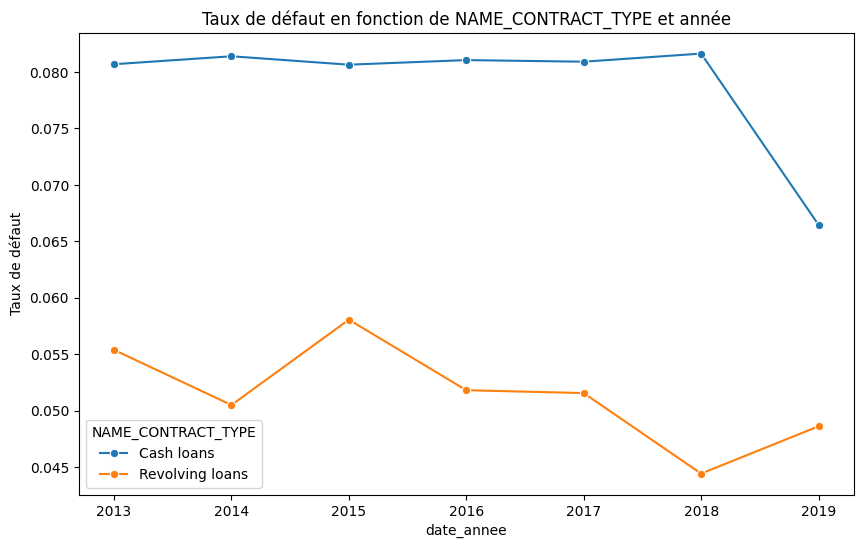

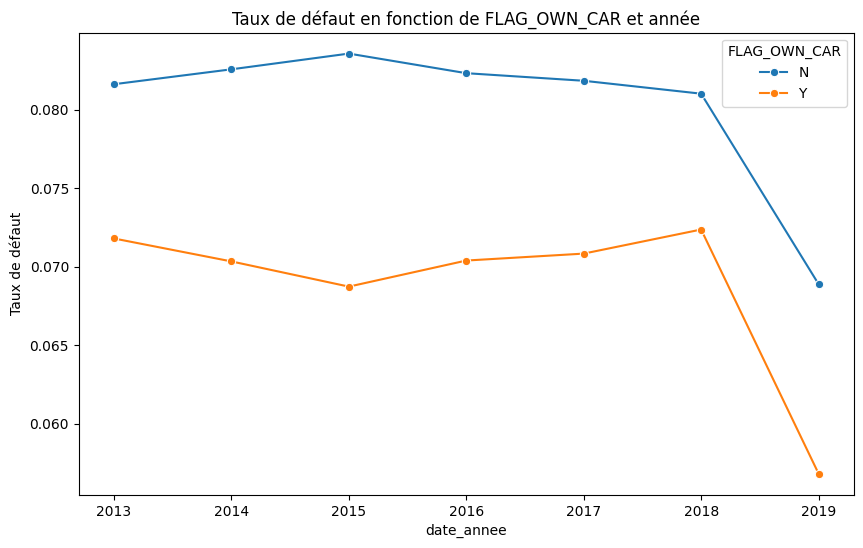

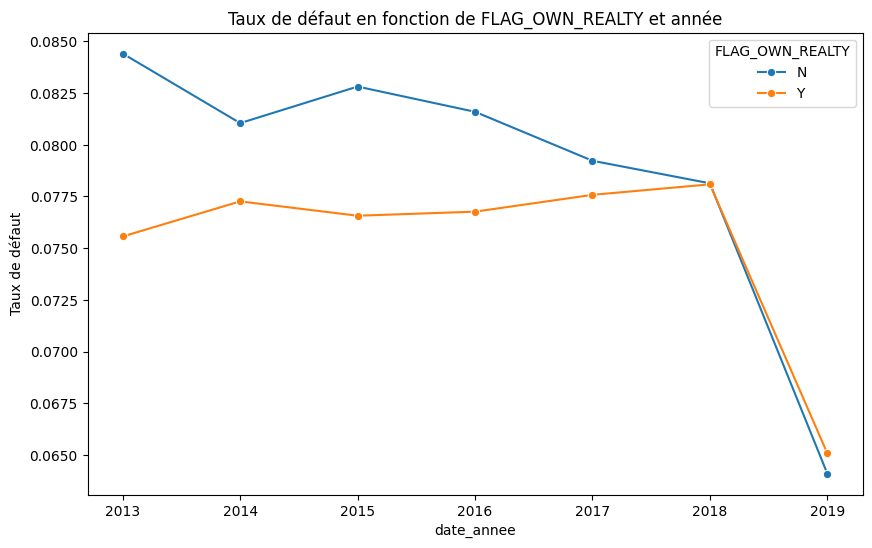

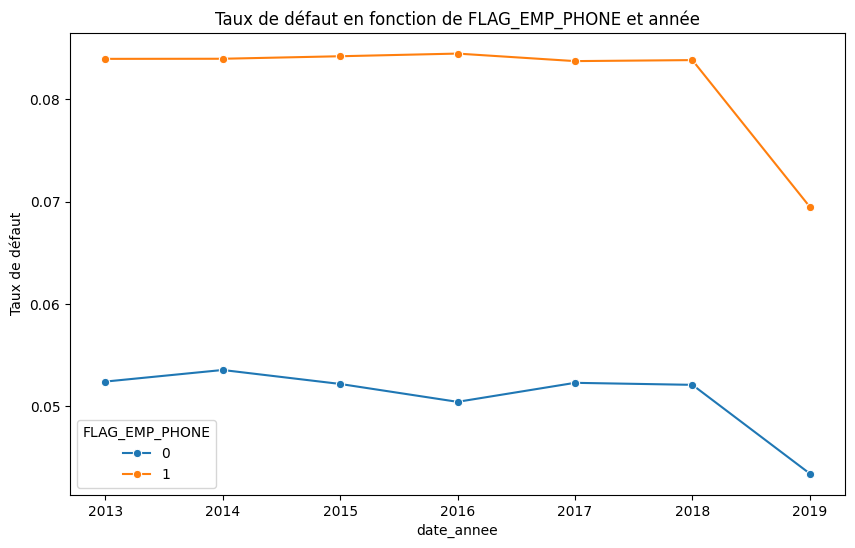

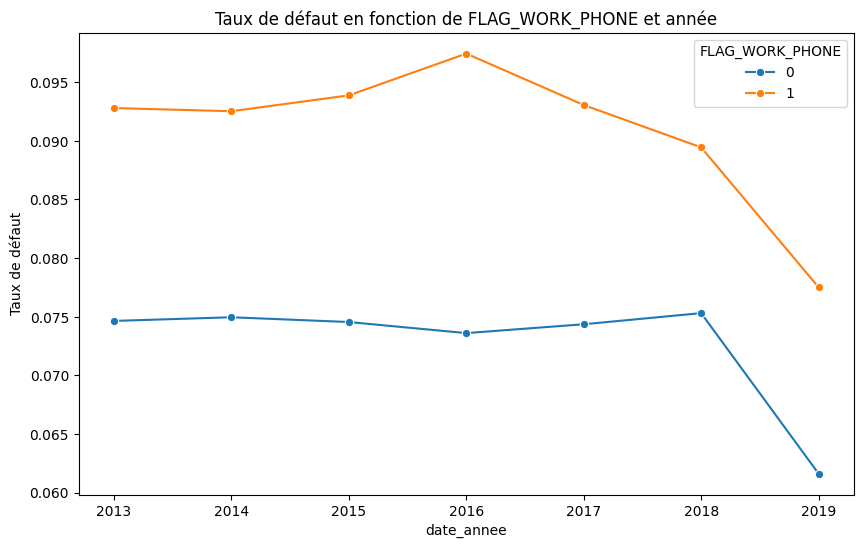

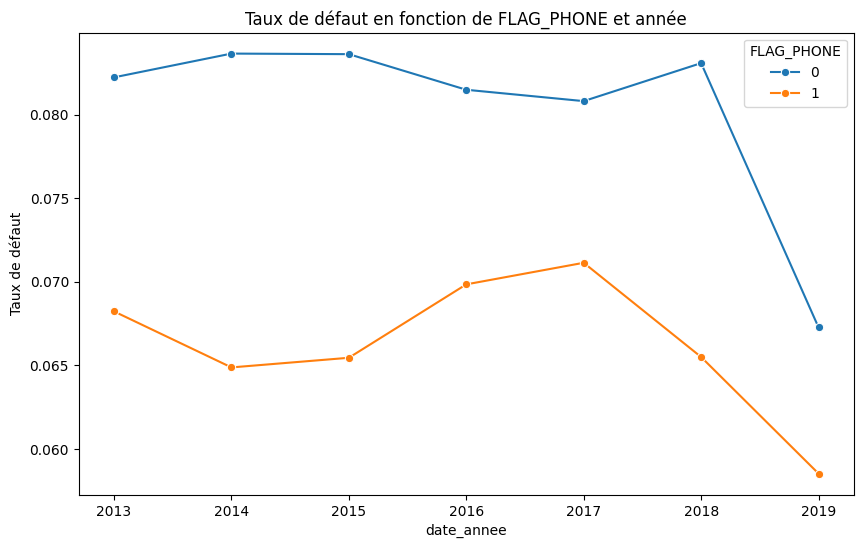

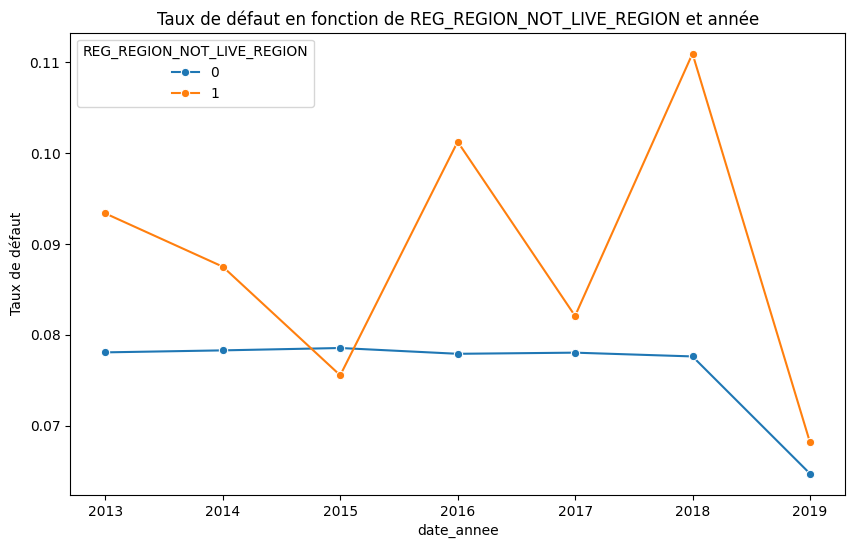

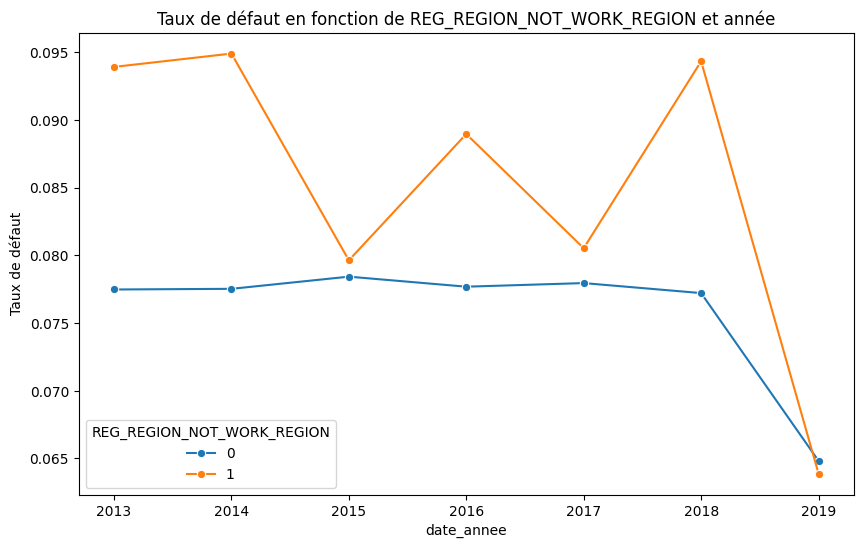

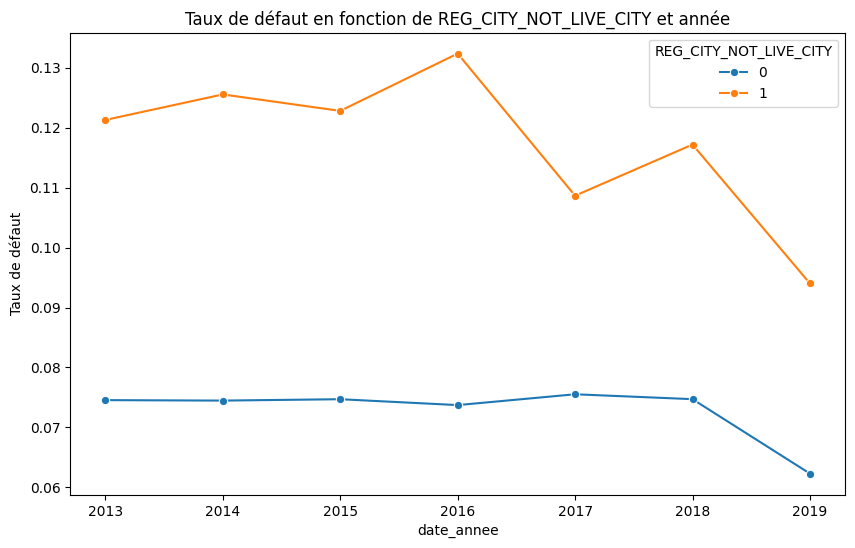

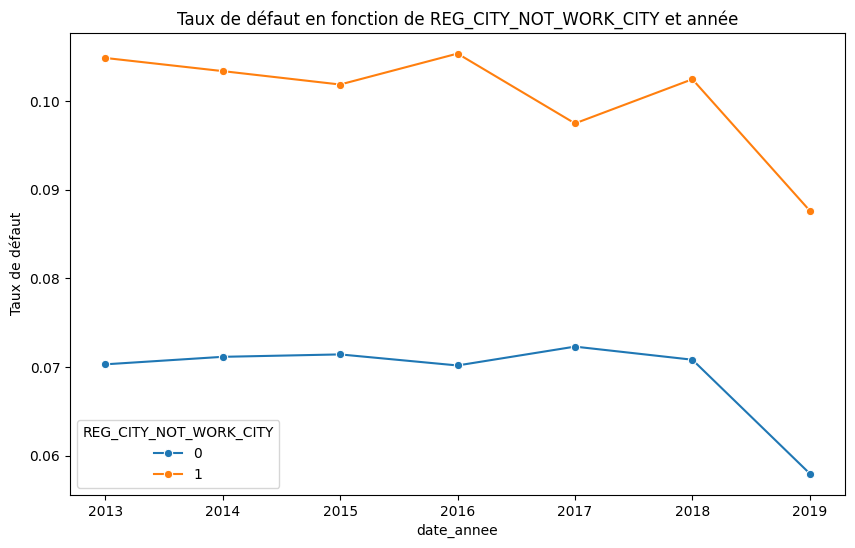

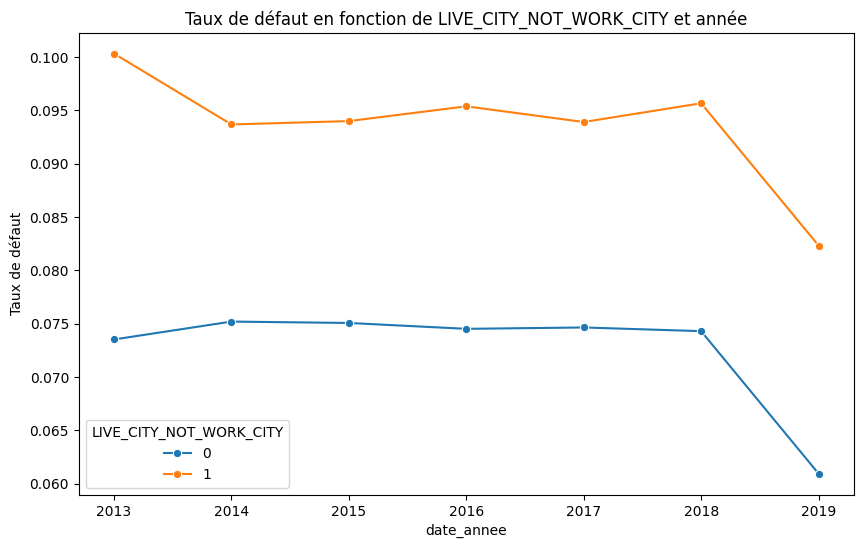

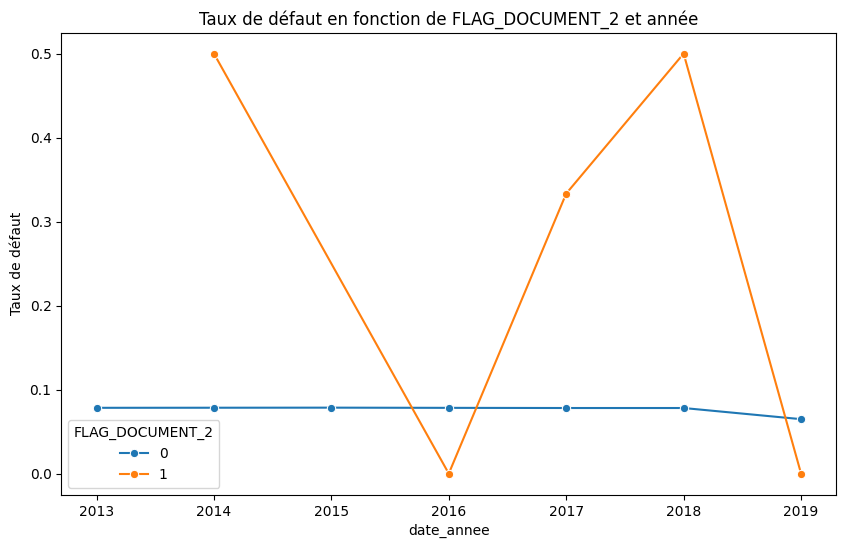

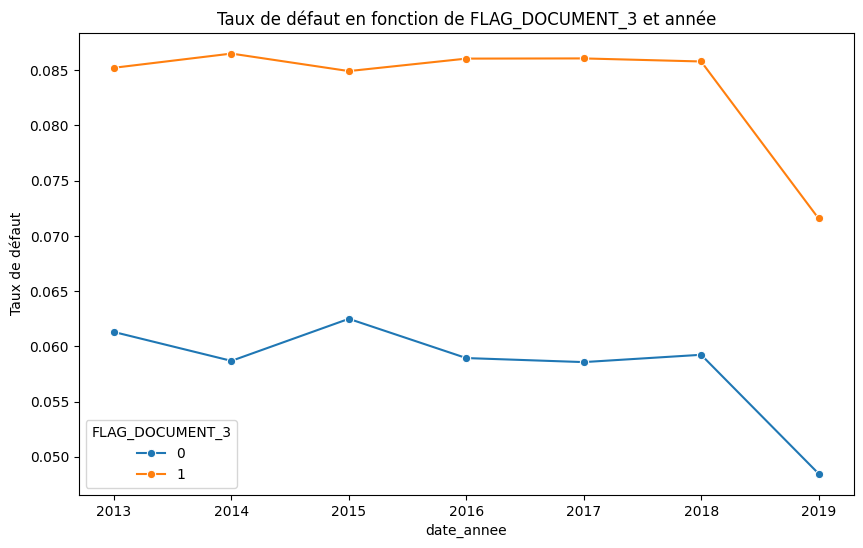

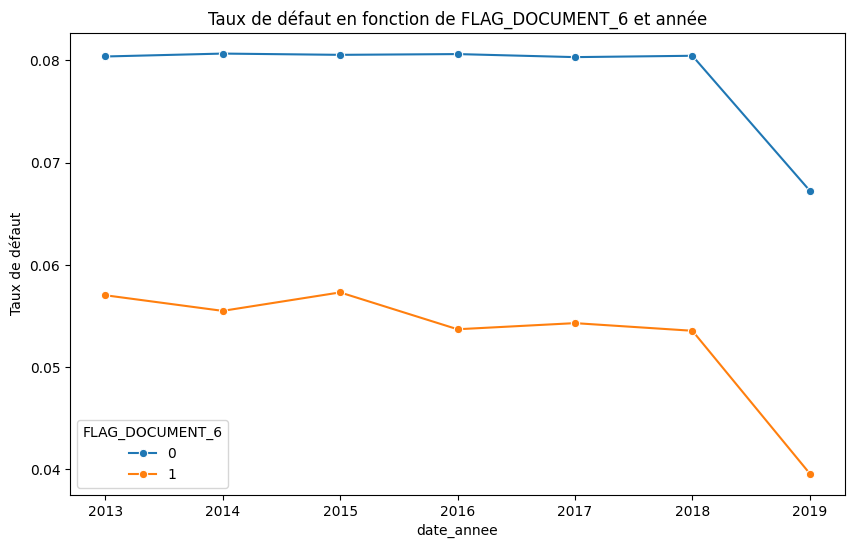

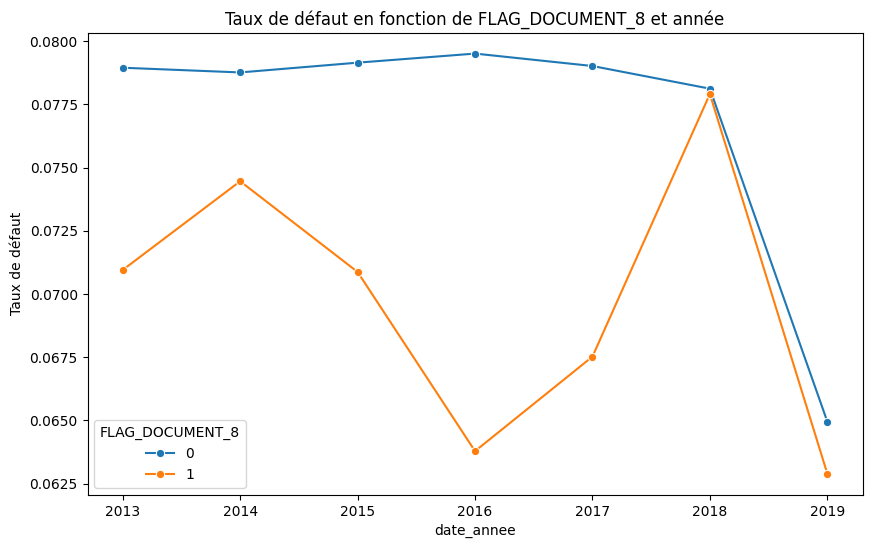

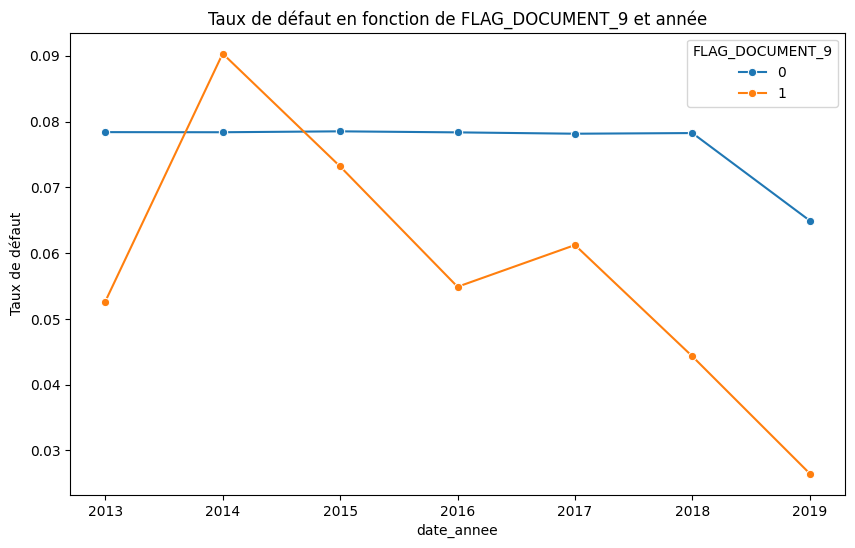

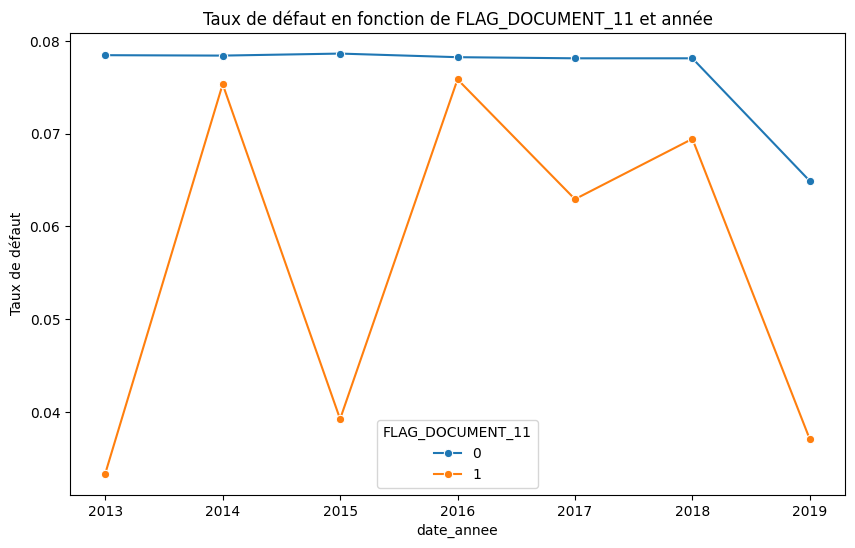

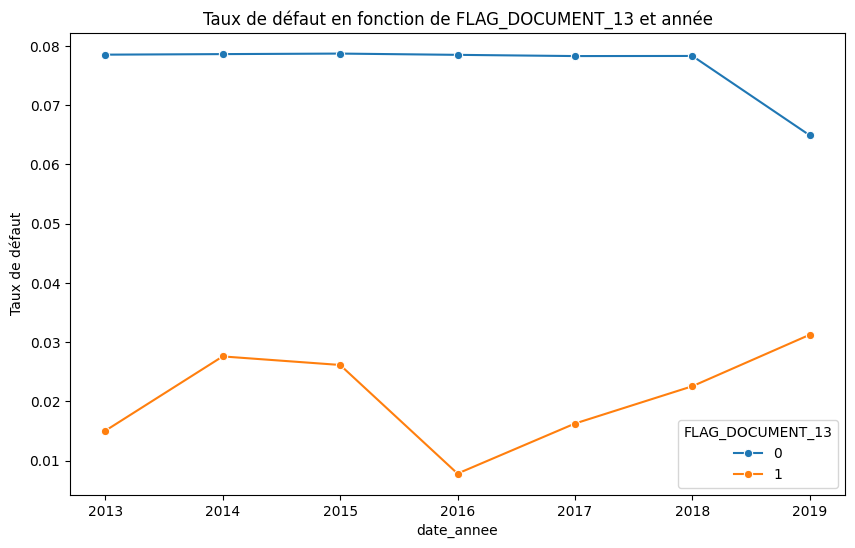

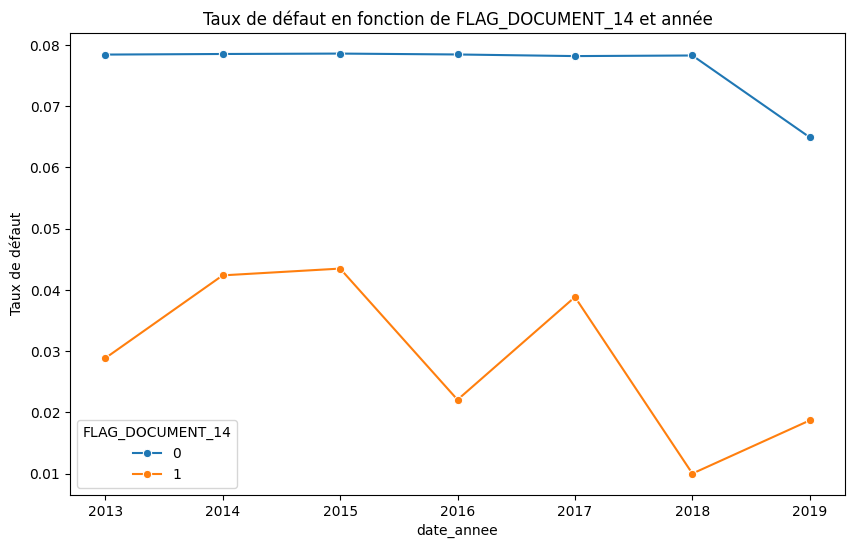

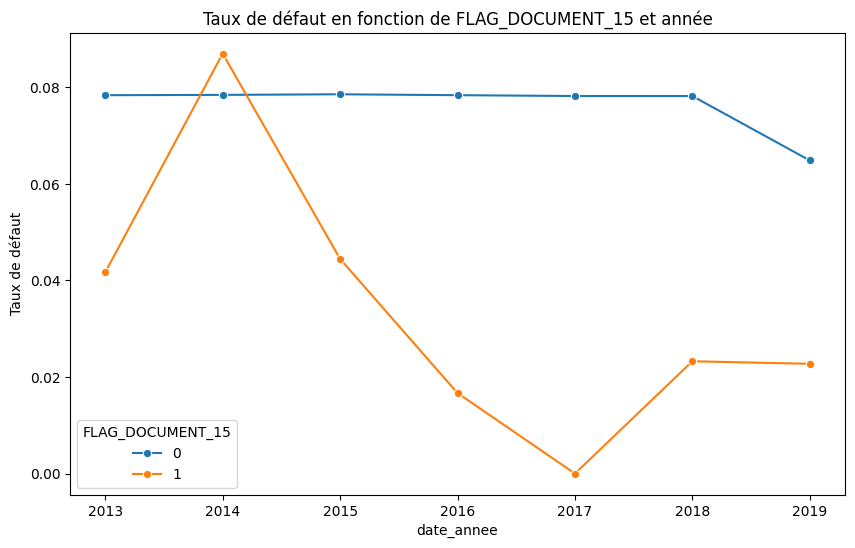

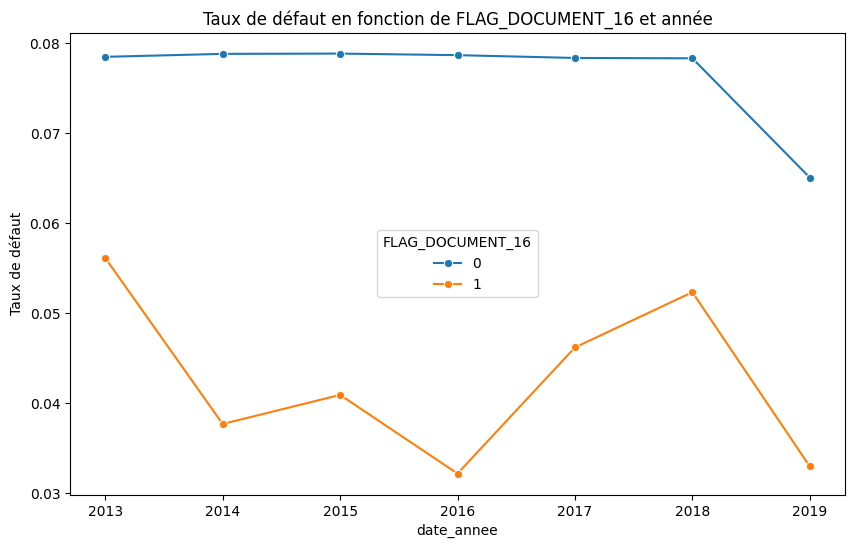

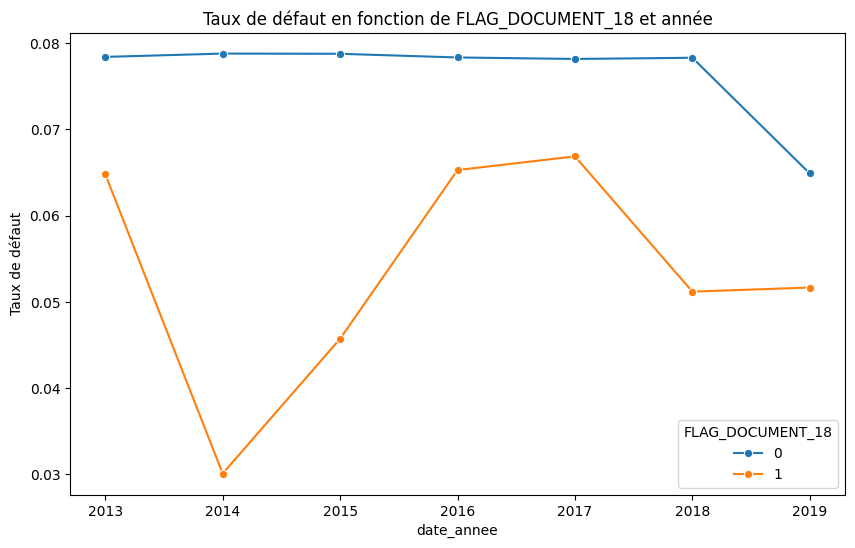

In [36]:
for var in binary_vars:
    show_risk_stability_overtime(data,var)

variables à écarter : 
FLAG_OWN_REALTY
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
FLAG_DOCUMENT_2
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_DOCUMENT_15
FLAG_DOCUMENT_11?
FLAG_DOCUMENT_14?
FLAG_DOCUMENT_16?
FLAG_DOCUMENT_18?


In [37]:
binary_risk_non_stable_vars=["FLAG_OWN_REALTY", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_15"]

In [38]:
binary_vars=list(filter(lambda x : x not in binary_risk_non_stable_vars, binary_vars))

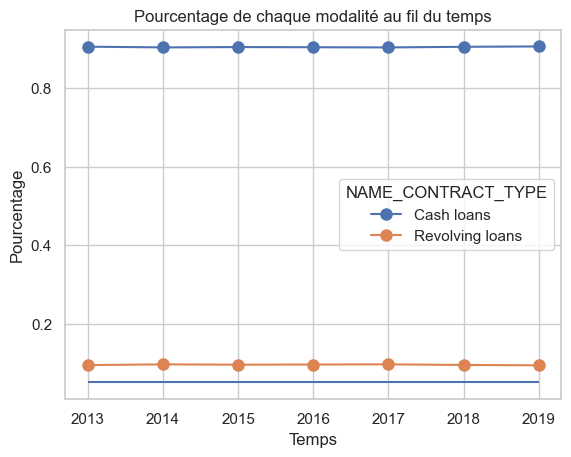

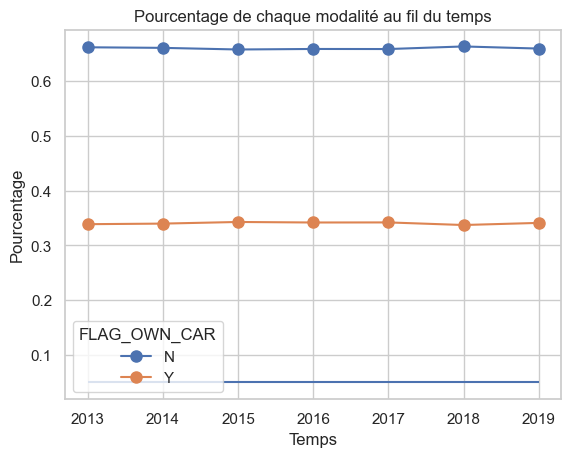

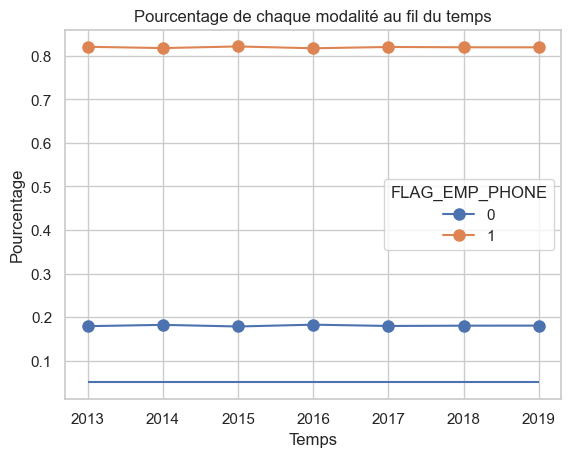

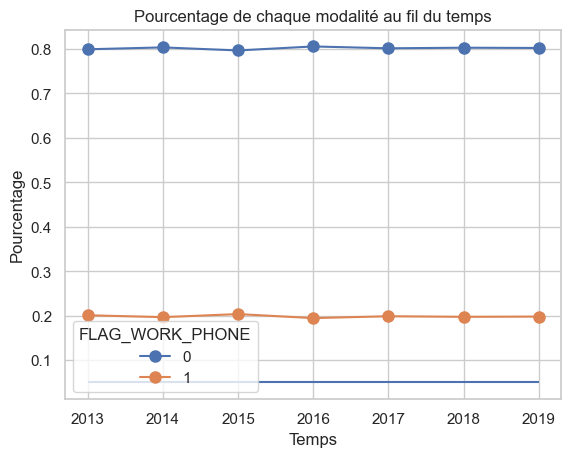

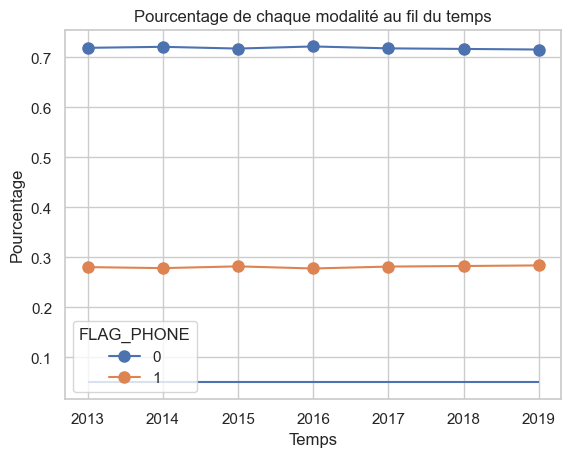

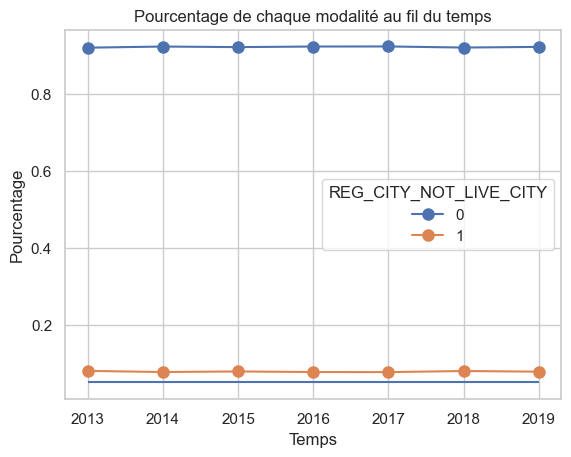

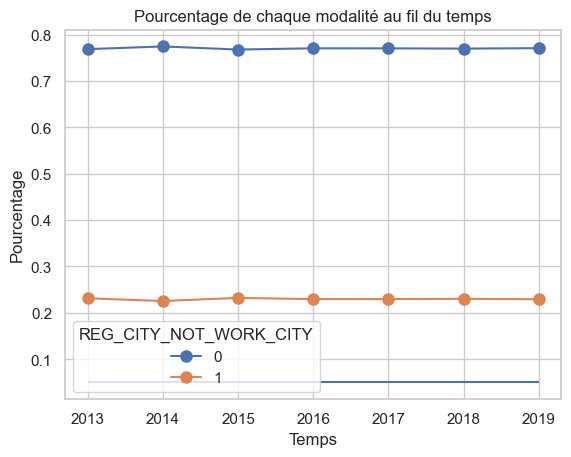

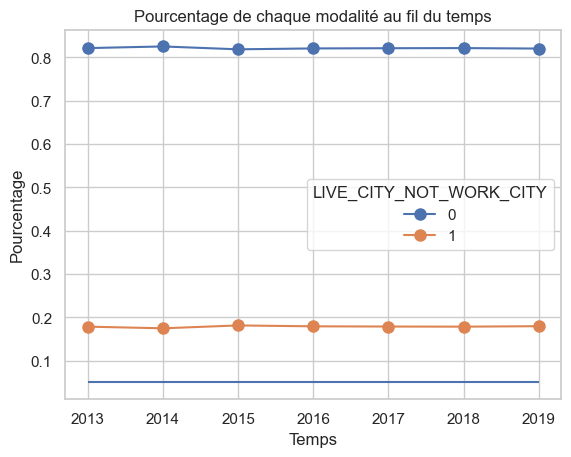

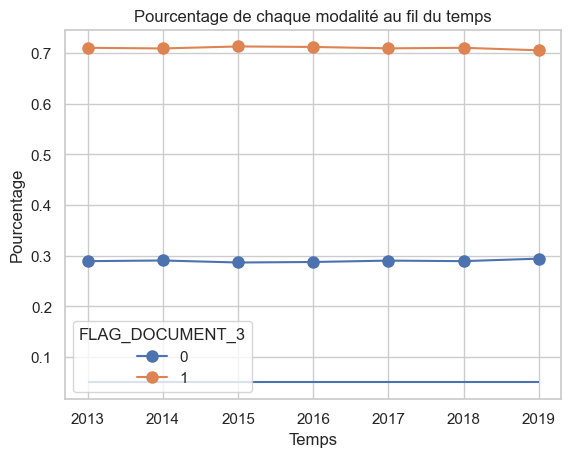

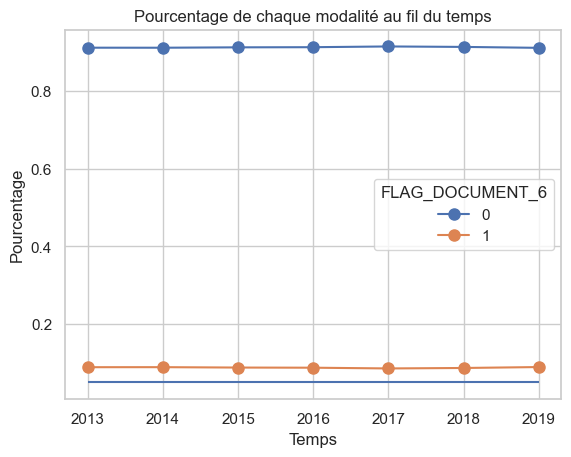

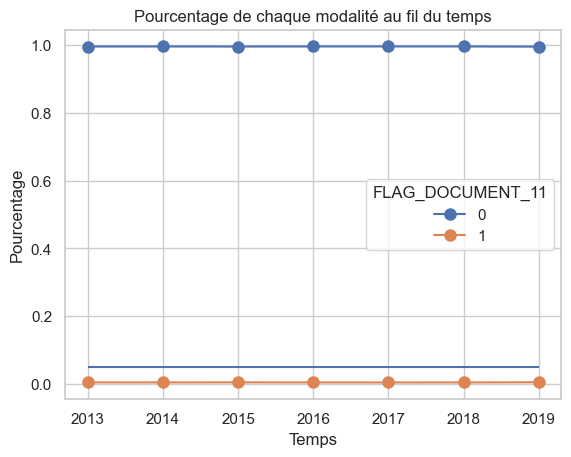

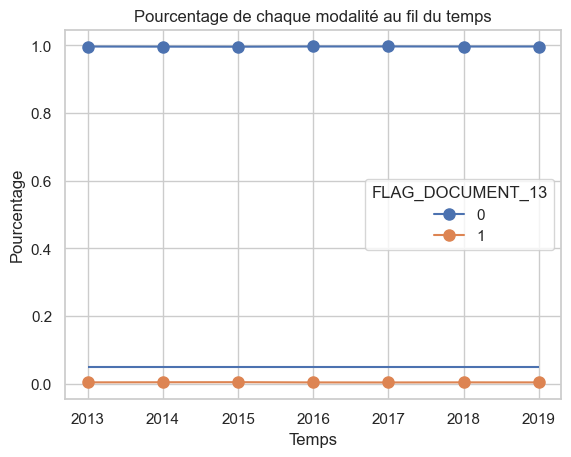

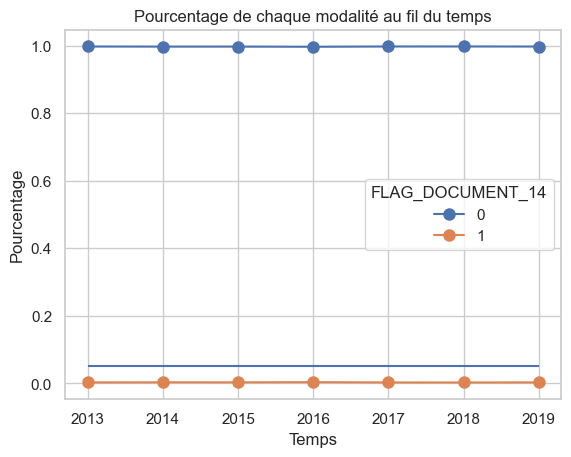

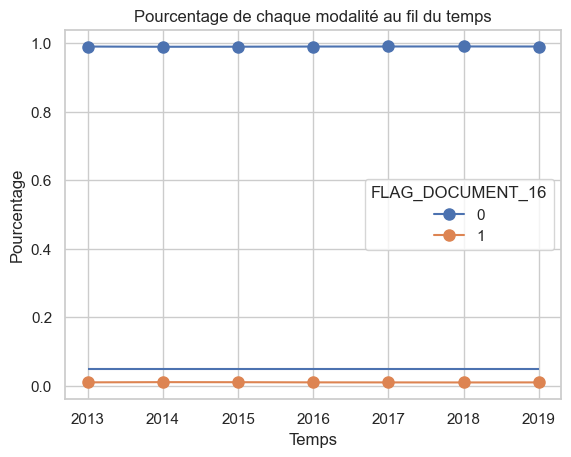

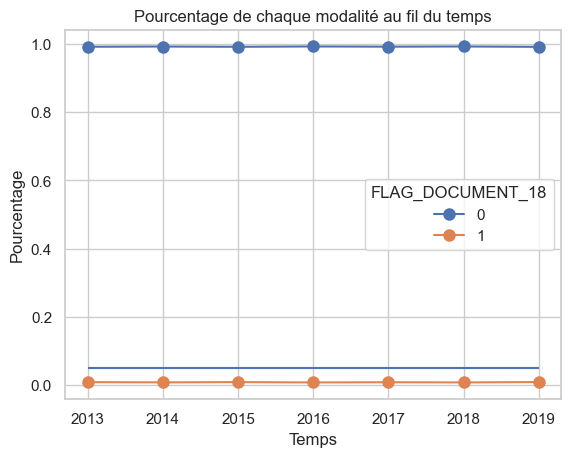

In [39]:
for var in binary_vars:
    show_volume_stability_overtime(data,var)

tous est stables ?

In [40]:
binary_volume_non_stable_vars=[]

In [41]:
# variables à virer parmi les binaires:
binary_non_stable_vars=list(set(binary_volume_non_stable_vars+binary_risk_non_stable_vars))

In [42]:

binary_vars=list(filter(lambda x : x not in binary_non_stable_vars,binary_vars))

In [43]:
data.drop(columns=binary_non_stable_vars, inplace=True)

In [44]:
#on redefinit nos variables catégorielle 'on enleve les variables binaires)
cat_vars=list(filter(lambda x : x not in binary_vars+binary_non_stable_vars,cat_vars))

# Stabilités catégorielles

In [45]:
cat_vars

['CODE_GENDER',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [46]:
binary_vars

['NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_18']

In [47]:
num_vars

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'date_mensuelle',
 'date_annee']

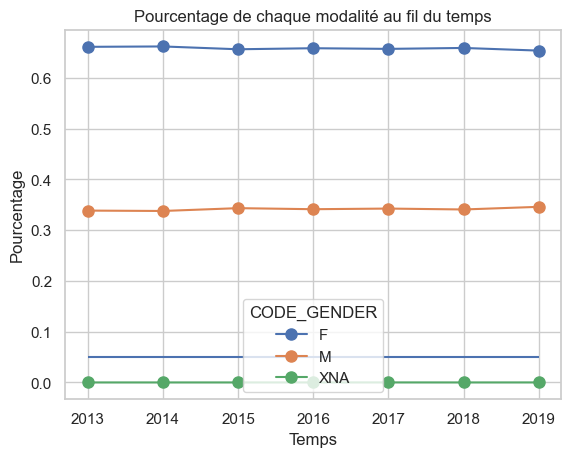

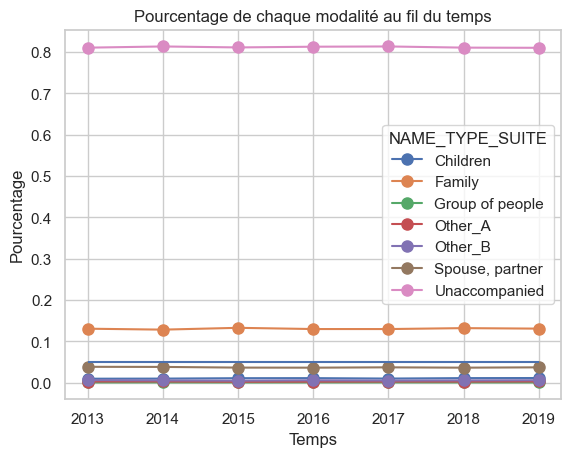

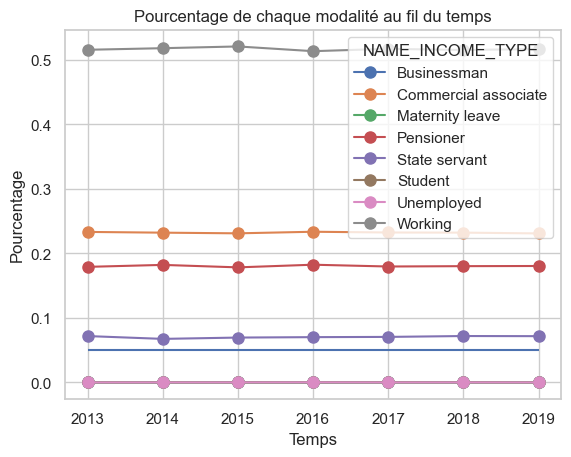

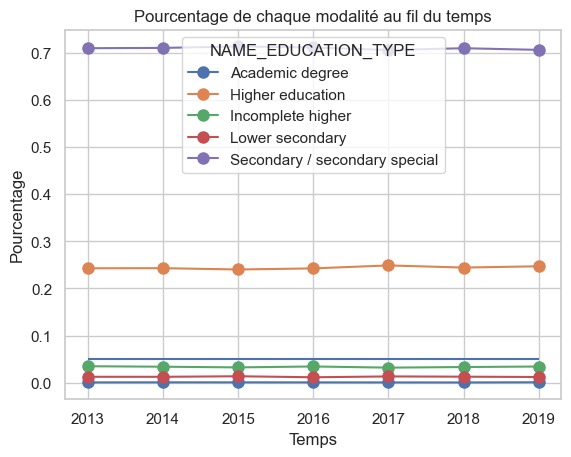

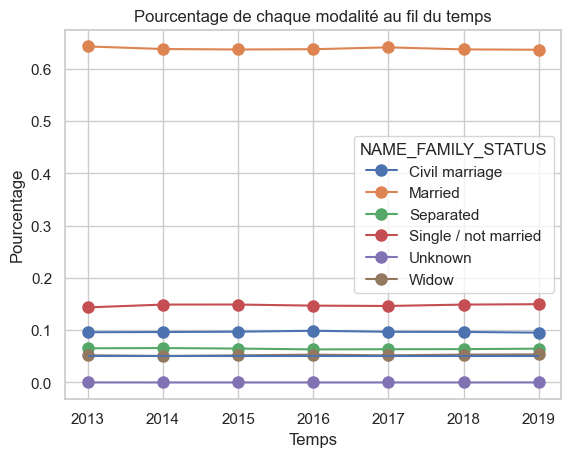

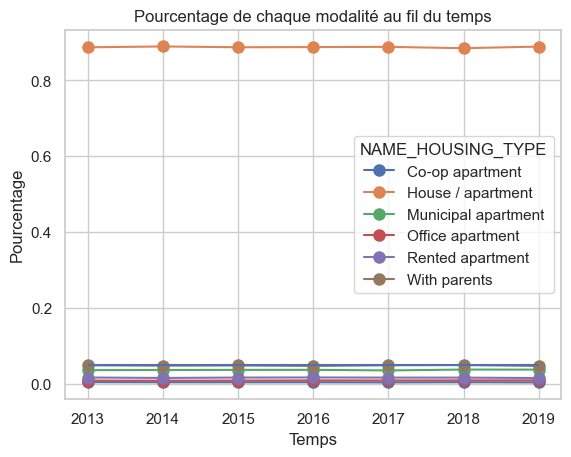

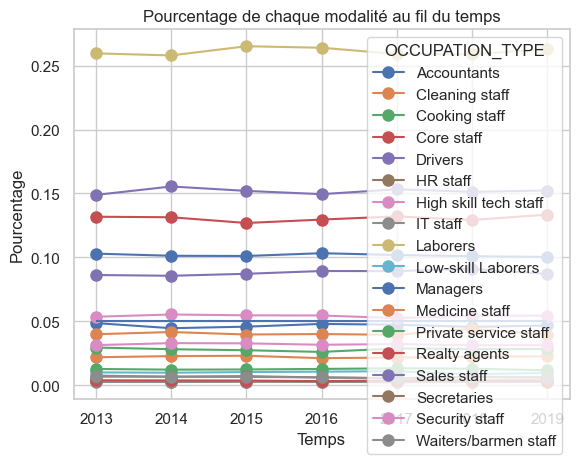

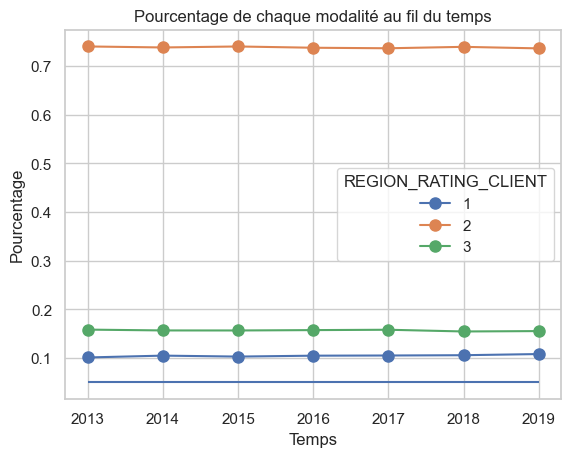

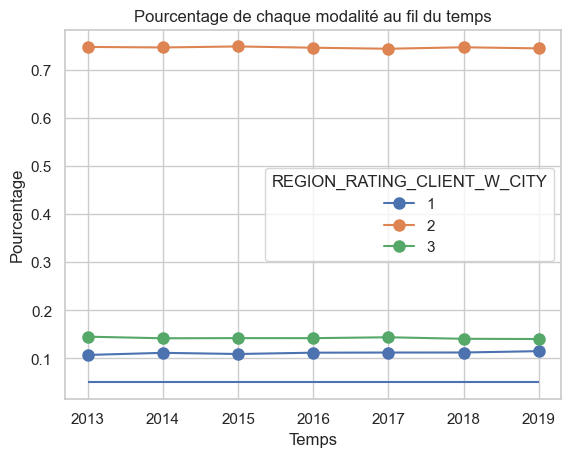

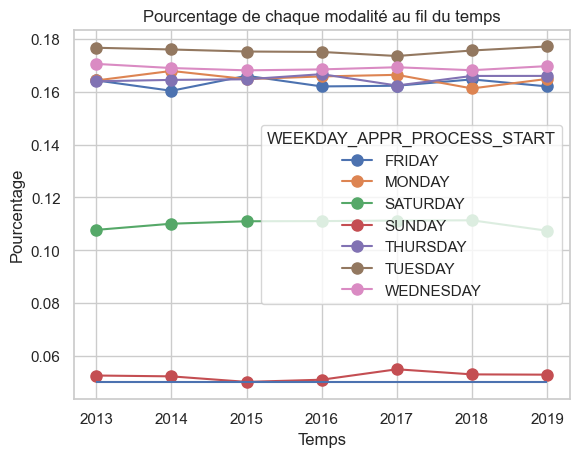

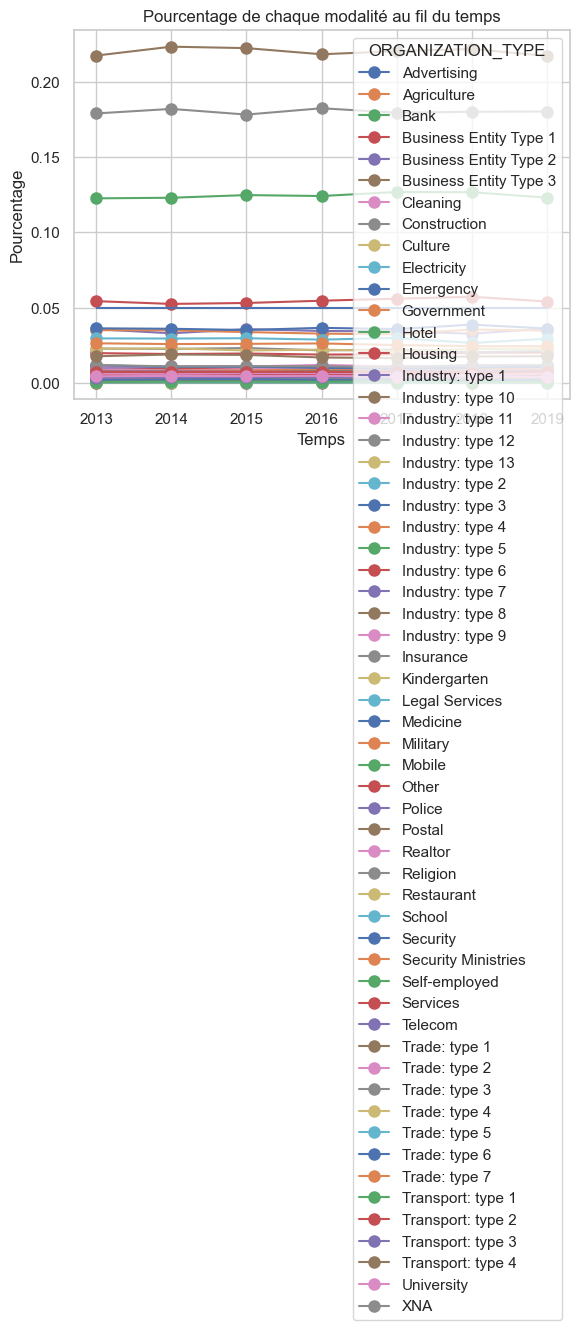

In [48]:
for col in cat_vars:
    show_volume_stability_overtime(data,col)

Les regroupements de modalités

In [49]:
# NAME_TYPE_SUITE 

Companion={
    "Family" : ["Family","Children","Spouse, partner"],
    "Friend" : ["Group of people", "Other_A", "Other_B"],
    "Other" : ["Unaccompanied"]
}

In [50]:
data["NAME_TYPE_SUITE"]=data["NAME_TYPE_SUITE"].map({value: key for key, values in Companion.items() for value in values})

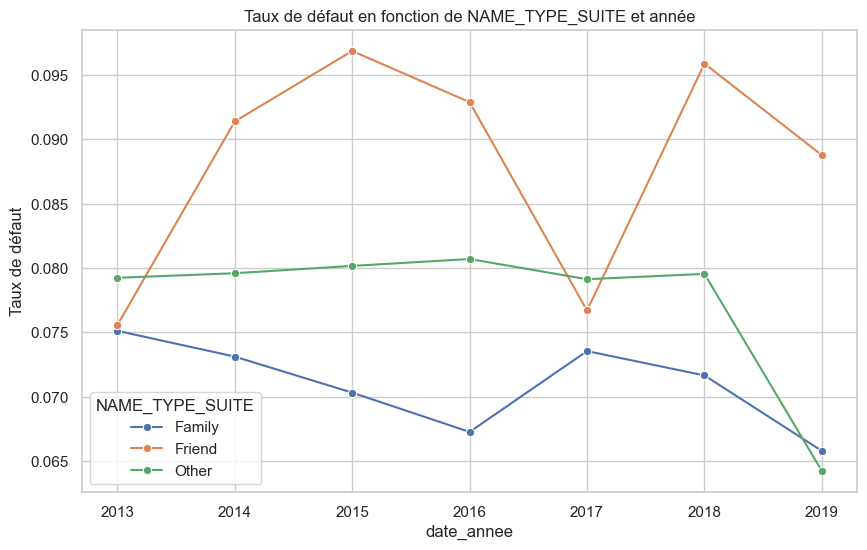

In [51]:
show_risk_stability_overtime(data,"NAME_TYPE_SUITE" )

In [52]:
# NAME_INCOME_TYPE

salaire={
    "Workers" : ["Working","Businessman","State servant","Commercial associate"],
    "Other" : ["Maternity leave", "Pensioner","Student",  "Unemployed"]
}

In [53]:
data["NAME_INCOME_TYPE"]=data["NAME_INCOME_TYPE"].map({value: key for key, values in salaire.items() for value in values})

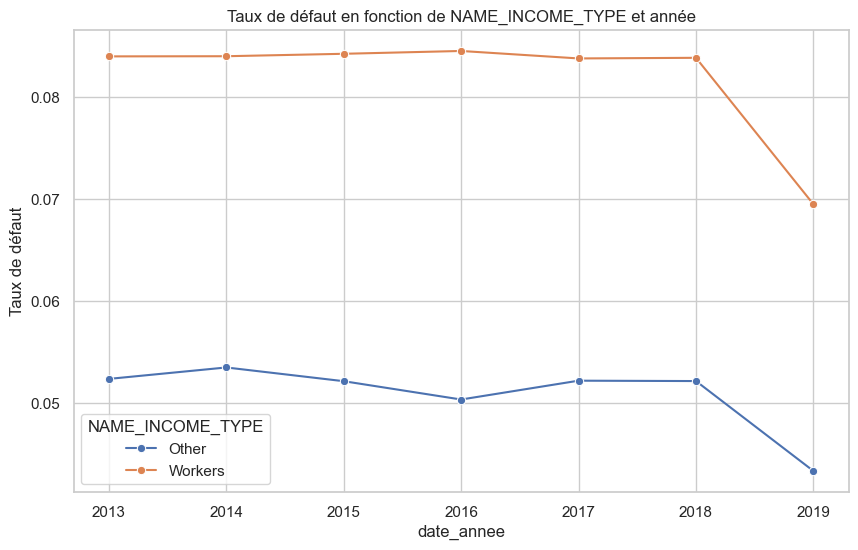

In [54]:
show_risk_stability_overtime(data,"NAME_INCOME_TYPE" )

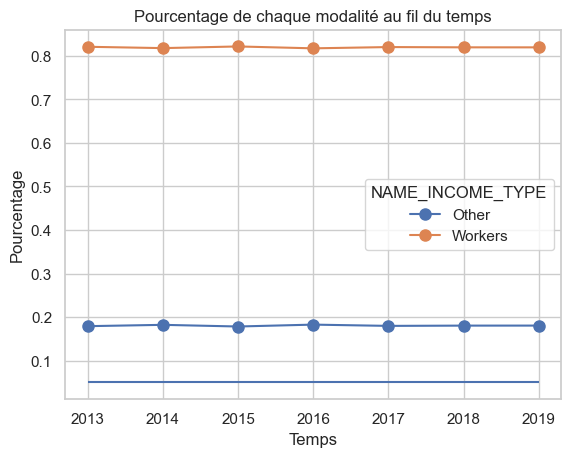

In [55]:
show_volume_stability_overtime(data,"NAME_INCOME_TYPE")

In [56]:
group_education_type={
    "Graduated" : ["Academic degree", "Higher education"],
    "Non graduated":["Lower secondary", "Secondary / secondary special", "Incomplete higher"]
}


In [57]:
data["NAME_EDUCATION_TYPE"]=data["NAME_EDUCATION_TYPE"].map({value: key for key, values in group_education_type.items() for value in values})

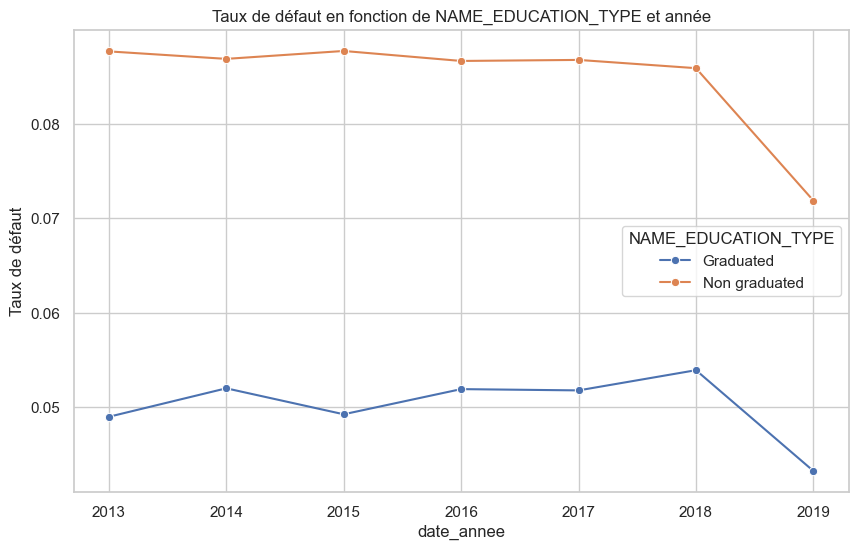

In [58]:
show_risk_stability_overtime(data,"NAME_EDUCATION_TYPE" )

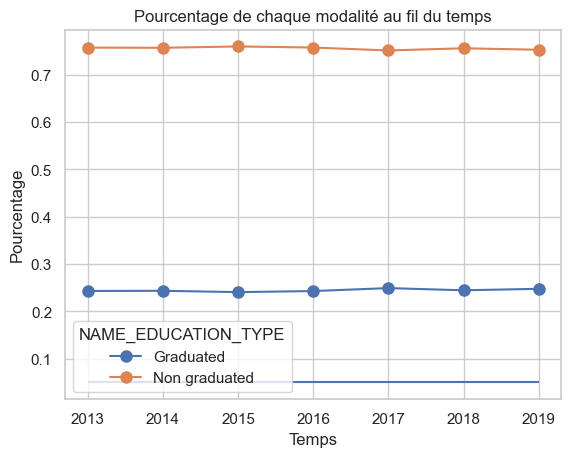

In [59]:
show_volume_stability_overtime(data,"NAME_EDUCATION_TYPE")

In [60]:
group_family_status={
    "Already_Married": ["Civil marriage", "Married","Separated", "widow"],
    "Single" :["Single / not married", "Unknown"]
    # "Separated": []
}

In [61]:
data["NAME_FAMILY_STATUS"]=data["NAME_FAMILY_STATUS"].map({value: key for key, values in group_family_status.items() for value in values})

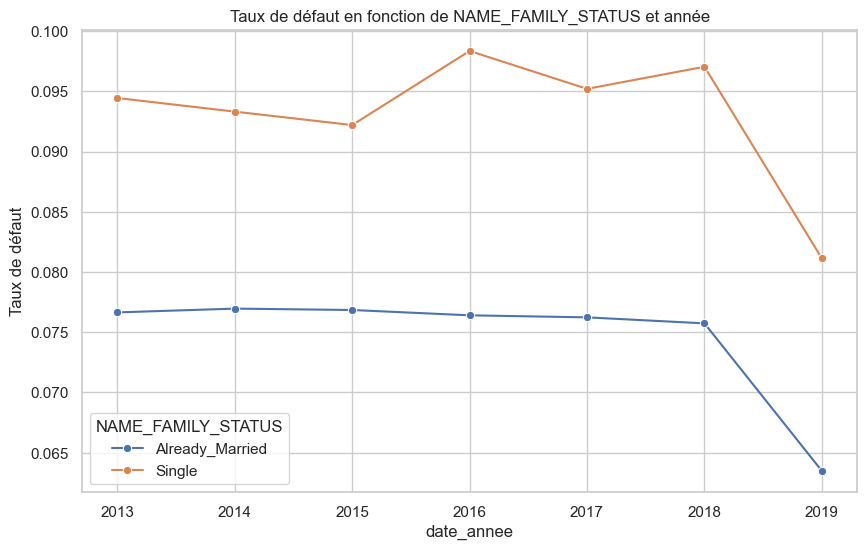

In [62]:
show_risk_stability_overtime(data,"NAME_FAMILY_STATUS" )

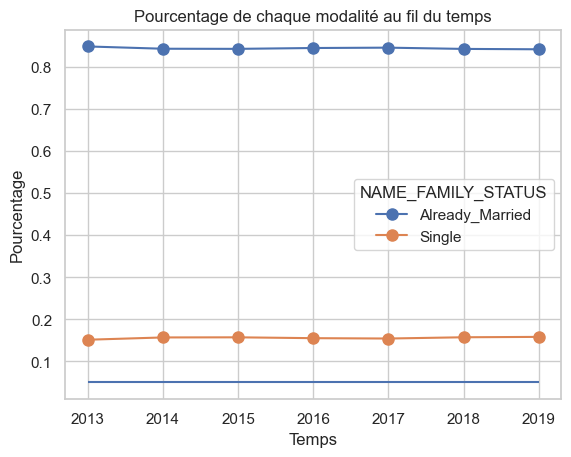

In [63]:
show_volume_stability_overtime(data,"NAME_FAMILY_STATUS" )

In [64]:
# OCCUPATION_TYPE
jobs={
    # "Low": ["Cleaning staff", "Cooking staff", "Core staff", "Driver", "Low_skill Laborers", "Sales staff", "Security staff"],
    "Middle" : ["Accountants", "HR staff", "Realty agents", "Secretaries", "Waiters/barmen staff", "Laborer","Cleaning staff", "Cooking staff", "Core staff", "Driver", "Low_skill Laborers", "Sales staff", "Security staff"],
    "High": ["High skill tech staff", "IT staff", "Manager", "Medecin staff", "Private service staff"] 
}

In [65]:
data["OCCUPATION_TYPE"]=data["OCCUPATION_TYPE"].map({value: key for key, values in jobs.items() for value in values})

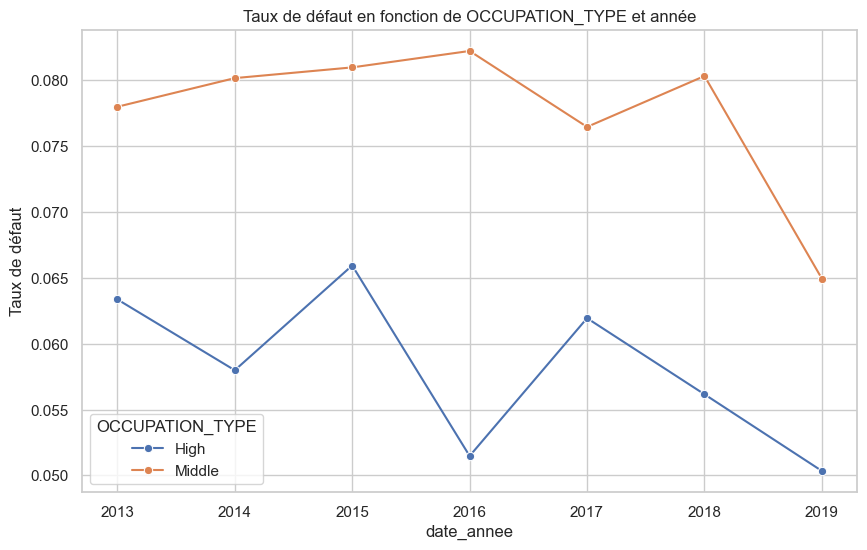

In [66]:
show_risk_stability_overtime(data,"OCCUPATION_TYPE" )

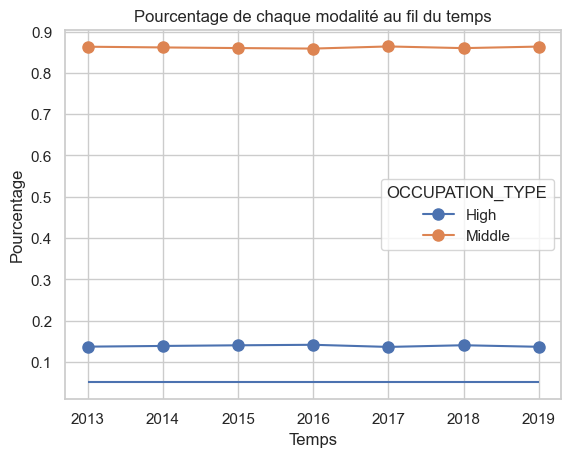

In [67]:
show_volume_stability_overtime(data,"OCCUPATION_TYPE" )

In [68]:
# WEEKDAY_APPR_PROCESS_START
Week={
    "Week" : ["MONDAY", "TUESDAY", "WEDNESDAY", "THURSDAY", "FRIDAY"],
    "end": ["SATURDAY", "SUNDAY"] 
}

In [69]:
data["WEEKDAY_APPR_PROCESS_START"]=data["WEEKDAY_APPR_PROCESS_START"].map({value: key for key, values in Week.items() for value in values})

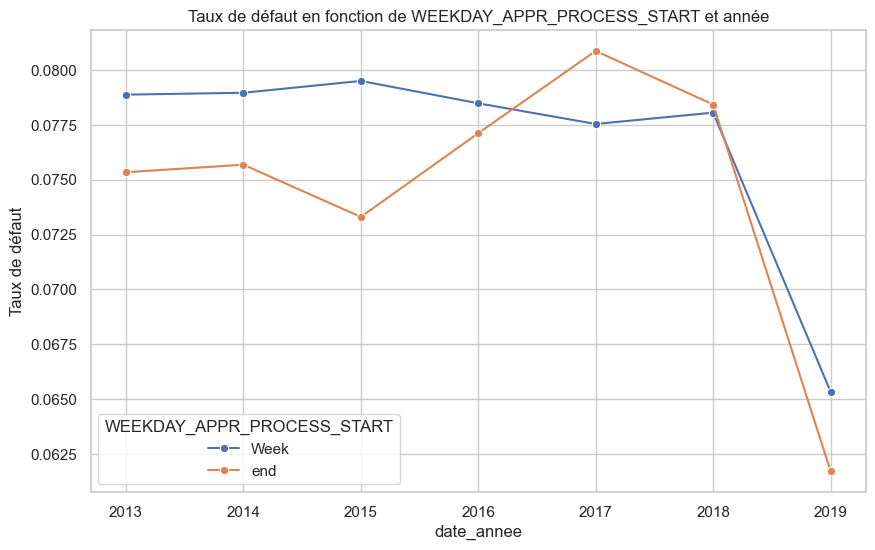

In [70]:
show_risk_stability_overtime(data,"WEEKDAY_APPR_PROCESS_START" )

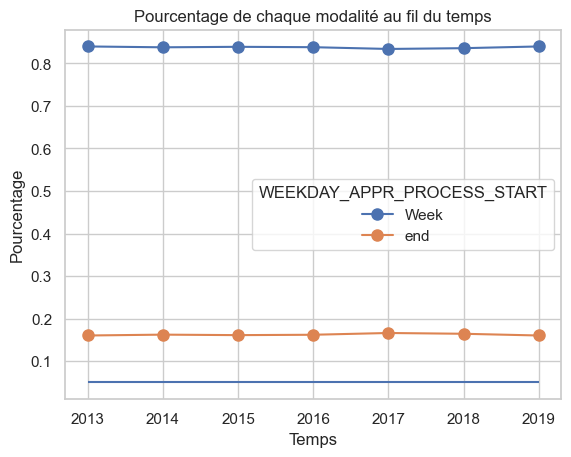

In [71]:
show_volume_stability_overtime(data,"WEEKDAY_APPR_PROCESS_START" )

In [72]:
cat_non_stable_vars=["NAME_TYPE_SUITE","WEEKDAY_APPR_PROCESS_START","ORGANIZATION_TYPE"]

In [73]:
# variables à virer parmi les binaires:
cat_non_stable_vars=list(set(cat_non_stable_vars))
cat_vars=list(filter(lambda x : x not in cat_non_stable_vars,cat_vars))
data.drop(columns=cat_non_stable_vars, inplace=True)

In [74]:
cat_vars = data.select_dtypes(include='object').columns.tolist()

num_vars = data.select_dtypes(exclude='object').columns.tolist()

In [75]:
binary_vars=[var for var in cat_vars if (data[var].nunique()==2)]
binary_vars

['NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'OCCUPATION_TYPE',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_18']

In [76]:
#on redefinit nos variables catégorielle 'on enleve les variables binaires)
cat_vars=list(filter(lambda x : x not in binary_vars,cat_vars))
cat_vars

['CODE_GENDER',
 'NAME_HOUSING_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY']

In [77]:
num_vars

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'date_mensuelle',
 'date_annee']

# Discrétisation variables numériques

In [83]:
data["SK_ID_CURR"].nunique()

267743

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267743 entries, 0 to 267742
Data columns (total 56 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   NAME_CONTRACT_TYPE            267743 non-null  object        
 1   CODE_GENDER                   267743 non-null  object        
 2   FLAG_OWN_CAR                  267743 non-null  object        
 3   NAME_INCOME_TYPE              267743 non-null  object        
 4   NAME_EDUCATION_TYPE           267743 non-null  object        
 5   NAME_FAMILY_STATUS            253728 non-null  object        
 6   NAME_HOUSING_TYPE             267743 non-null  object        
 7   FLAG_EMP_PHONE                267743 non-null  object        
 8   FLAG_WORK_PHONE               267743 non-null  object        
 9   FLAG_PHONE                    267743 non-null  object        
 10  OCCUPATION_TYPE               91622 non-null   object        
 11  REGION_RATING_CLIE

In [89]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

class DecisionTreeDiscretizer:
    def __init__(self, max_bins=5, target=None):
        self.tree_max_bins = max_bins
        self.clf = DecisionTreeClassifier(criterion="entropy", max_depth=self.tree_max_bins//2,
                                          min_samples_split=0.05, min_samples_leaf=0.05)
        self.target = target

    def fit(self, X_train):
        # Entraîner le modèle sur les données d'entraînement
        self.clf.fit(X_train.values.reshape(-1, 1), self.target)

    def _get_tree_thresholds(self):
        thresholds = set()
        for node in range(self.clf.tree_.node_count):
            if self.clf.tree_.children_left[node] != self.clf.tree_.children_right[node]:  # non-leaf node
                feature = self.clf.tree_.feature[node]
                threshold = self.clf.tree_.threshold[node]
                thresholds.add(threshold)
        return np.array(list(thresholds))

    def get_thresholds(self):
        if hasattr(self.clf, 'tree_') and self.clf.tree_ is not None:
            thresholds_np = self._get_tree_thresholds()
            thresholds = [-np.inf] + sorted(list(set(list(thresholds_np)))) + [np.inf]
            return thresholds
        else:
            raise ValueError("Le classifieur n'est pas entraîné. Utilisez la méthode fit avant d'obtenir les seuils.")

    def transform(self, X):
        # Vérifier si le modèle est entraîné
        if not hasattr(self.clf, 'tree_') or self.clf.tree_ is None:
            raise ValueError("Le classifieur n'est pas entraîné. Utilisez la méthode fit avant de transformer les données de test.")

        thresholds = self.get_thresholds()

        # Utiliser pd.cut pour obtenir les intervalles au lieu des numéros
        intervals = pd.cut(X.values.flatten(), bins=thresholds, include_lowest=True, right=True)
        return intervals



In [90]:
data_train, data_test=train_test_split(data, test_size=0.3, stratify=data["TARGET"])

In [81]:
data_train.dtypes

NAME_CONTRACT_TYPE                      object
CODE_GENDER                             object
FLAG_OWN_CAR                            object
NAME_INCOME_TYPE                        object
NAME_EDUCATION_TYPE                     object
NAME_FAMILY_STATUS                      object
NAME_HOUSING_TYPE                       object
FLAG_EMP_PHONE                          object
FLAG_WORK_PHONE                         object
FLAG_PHONE                              object
OCCUPATION_TYPE                         object
REGION_RATING_CLIENT                    object
REGION_RATING_CLIENT_W_CITY             object
REG_CITY_NOT_LIVE_CITY                  object
REG_CITY_NOT_WORK_CITY                  object
LIVE_CITY_NOT_WORK_CITY                 object
FLAG_DOCUMENT_3                         object
FLAG_DOCUMENT_6                         object
FLAG_DOCUMENT_11                        object
FLAG_DOCUMENT_13                        object
FLAG_DOCUMENT_14                        object
FLAG_DOCUMENT

In [91]:
dt_discretizer=DecisionTreeDiscretizer(target=data_train["TARGET"])

for col in num_vars:
    dt_discretizer.fit(data_train[col])
    data_train[col]=dt_discretizer.transform(data_train[col])
    data_test[col]=dt_discretizer.transform(data_test[col])

ValueError: Bin edges must be unique: array([-inf,  0.5,  inf,  inf]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [104]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

class DecisionTreeDiscretizer:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree_models = {}

    def fit(self, X, y, variable):
        # Convertir la variable en un tableau numpy
        X_np = X[variable].to_numpy().reshape(-1, 1)

        # Créer un arbre de décision pour la variable spécifiée
        tree_model = DecisionTreeClassifier(max_depth=self.max_depth)
        tree_model.fit(X_np, y)

        # Stocker le modèle dans le dictionnaire
        self.tree_models[variable] = tree_model

    def transform(self, X):
        # Appliquer la transformation pour chaque variable
        for variable, tree_model in self.tree_models.items():
            X_np = X[variable].to_numpy().reshape(-1, 1)
            X[variable] = tree_model.apply(X_np)

        return X




In [105]:
dt_discretizer = DecisionTreeDiscretizer(max_depth=3)

for col in num_vars:
    dt_discretizer.fit(data_train, data_train["TARGET"], col)
    data_train = dt_discretizer.transform(data_train)
    data_test = dt_discretizer.transform(data_test)

In [107]:
discretised_cols=["CNT_FAM_MEMBERS","AMT_CREDIT_TO_INCOME" , "BORROWER_AGE", "BORROWER_SENIORITY","BORROWER_FIDELITY", "AMT_CREDIT_NORM","AMT_ANNUITY","AMT_GOODS_PRICE"]

In [108]:
for col in dt_discretizer:
    show_risk_stability_overtime(data_train,col)

TypeError: 'DecisionTreeDiscretizer' object is not iterable

In [112]:
def discretize_all_numeric_variables(data, num_bins):
    result = data.copy()

    # Sélectionner toutes les variables numériques
    numerical_vars = data.select_dtypes(include='number').columns.tolist()

    for colname in numerical_vars:
        # Discrétiser les valeurs en fonction des quantiles
        result[f'{colname}_discrete'], bins = pd.qcut(data[colname], q=num_bins, retbins=True, labels=False, duplicates='drop')

        # Vérifier le nombre de modalités après discrétisation
        num_modalities = result[f'{colname}_discrete'].nunique()

        # Si le nombre de modalités est trop élevé, ajuster les groupes
        if num_modalities > num_bins:
            result[f'{colname}_discrete'], bins = pd.qcut(data[colname], q=num_bins, retbins=True, labels=False, duplicates='drop')

        # Afficher le lineplot de stabilité dans le temps
        show_risk_stability_overtime(result, f'{colname}_discrete')

    return result

def show_risk_stability_overtime(data, colname_discrete):
    result = data.groupby([colname_discrete, "date_annee"])['TARGET'].value_counts(normalize=True).unstack().fillna(0)[1]

    # Tracer le lineplot
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=result.index.get_level_values("date_annee"), y=result.values, hue=result.index.get_level_values(colname_discrete), marker='o')

    # Ajouter des étiquettes et un titre
    plt.xlabel('date_annee')
    plt.ylabel('Taux de défaut')
    plt.title(f"Taux de défaut en fonction de {colname_discrete} et année")

    # Ajouter une légende
    plt.legend(title=colname_discrete)

    # Afficher le graphique
    plt.show()

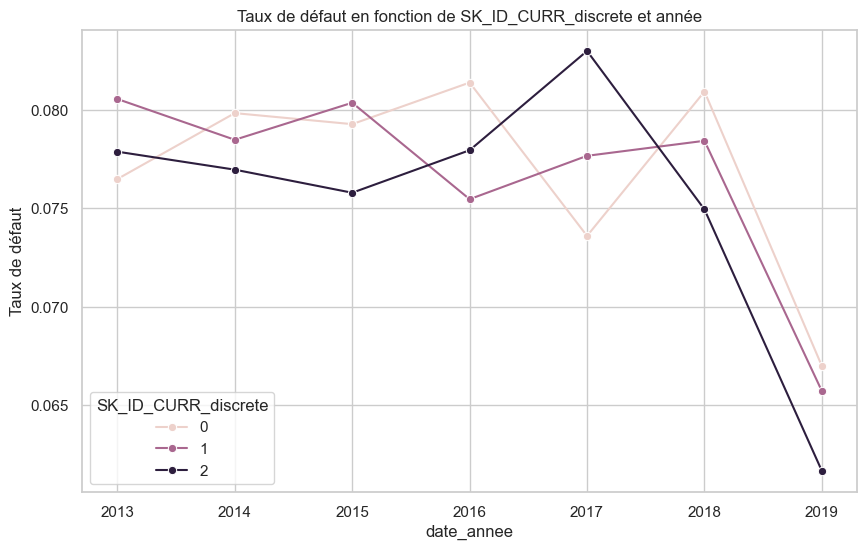

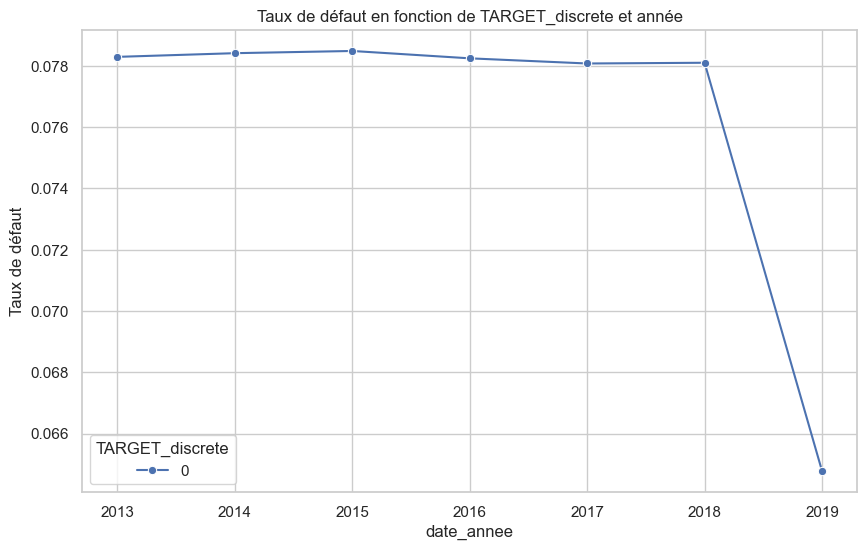

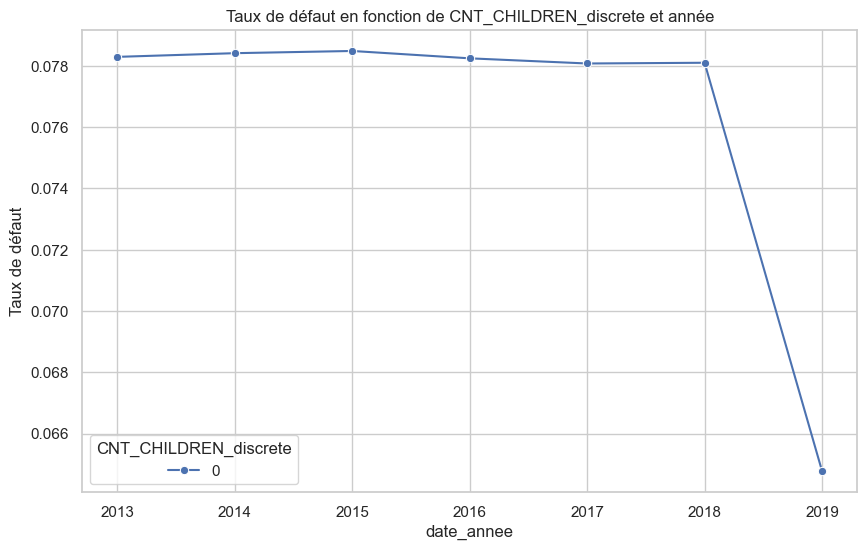

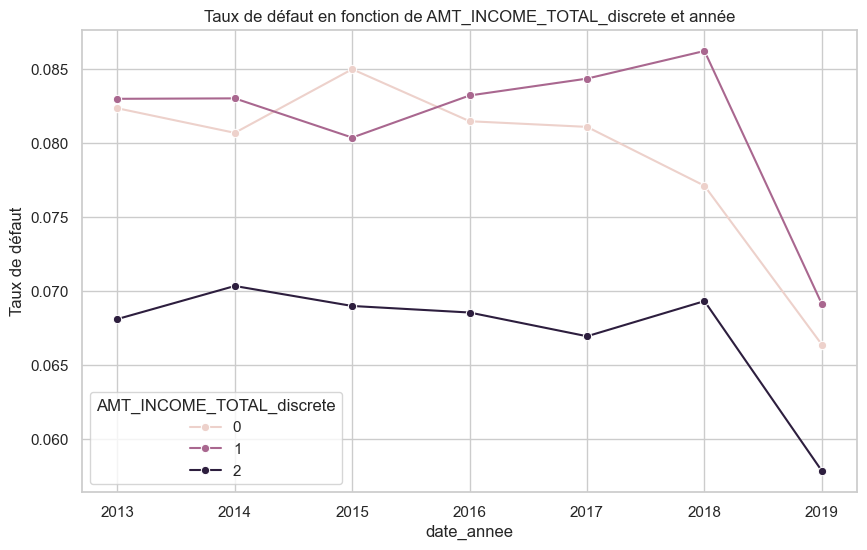

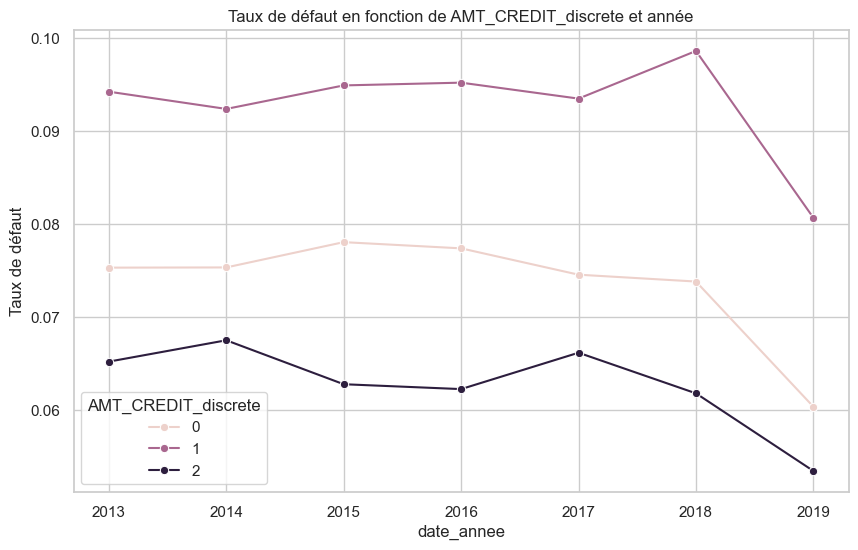

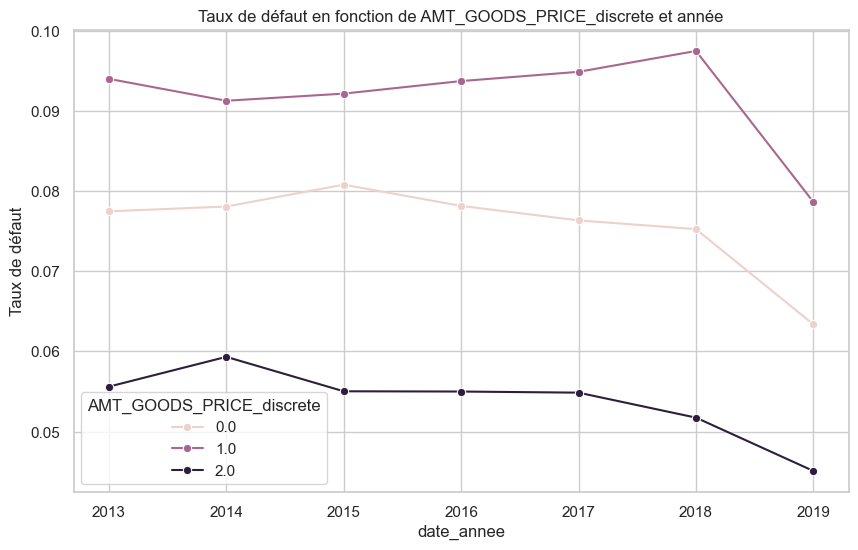

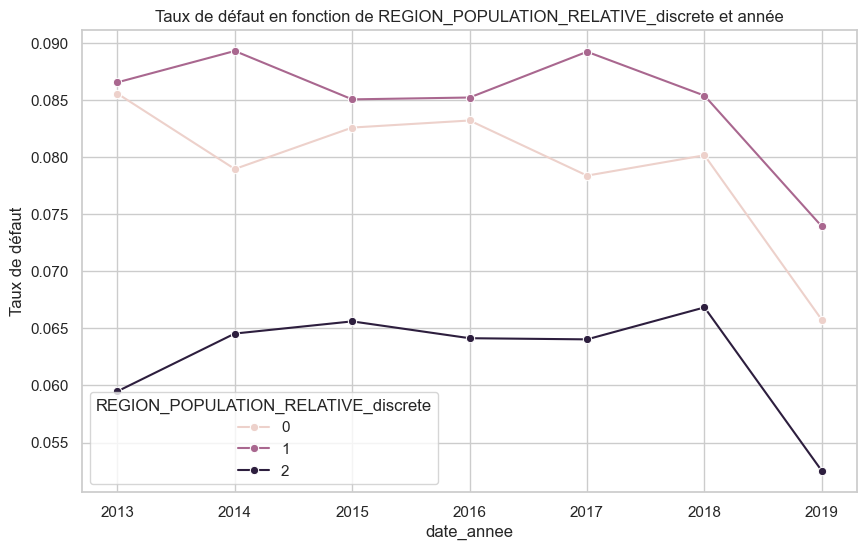

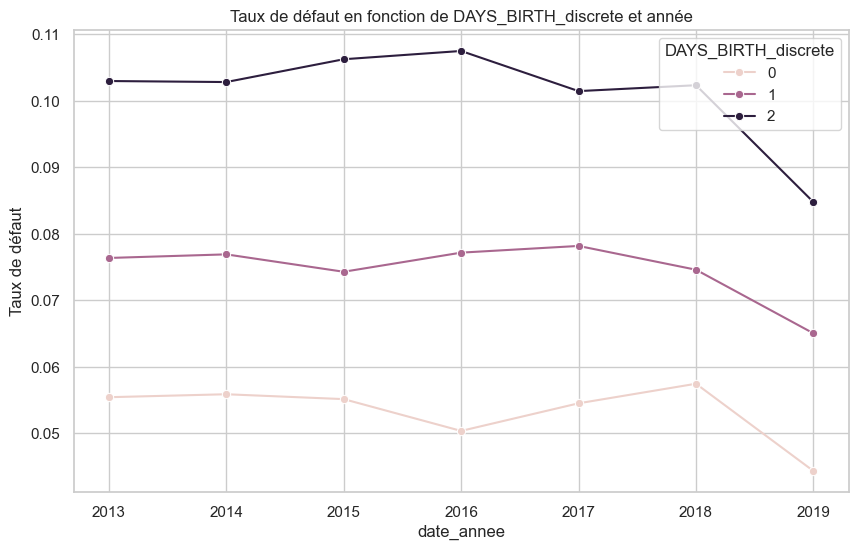

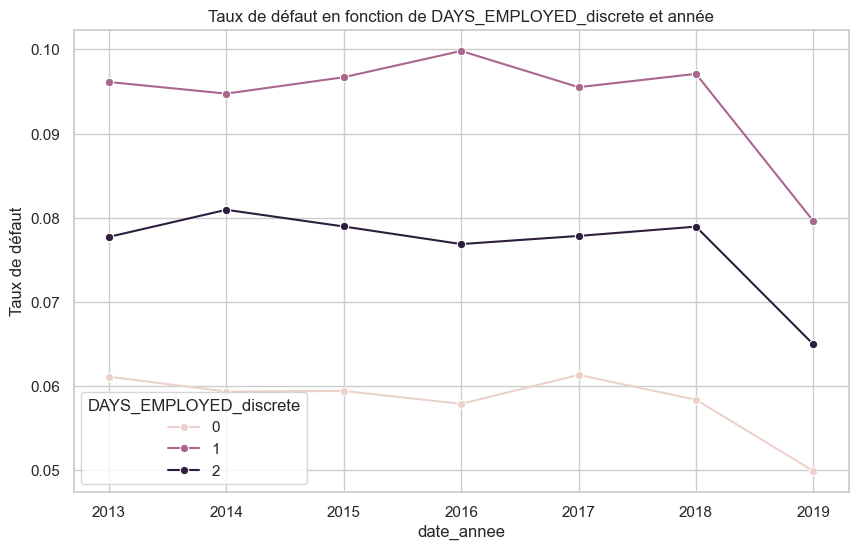

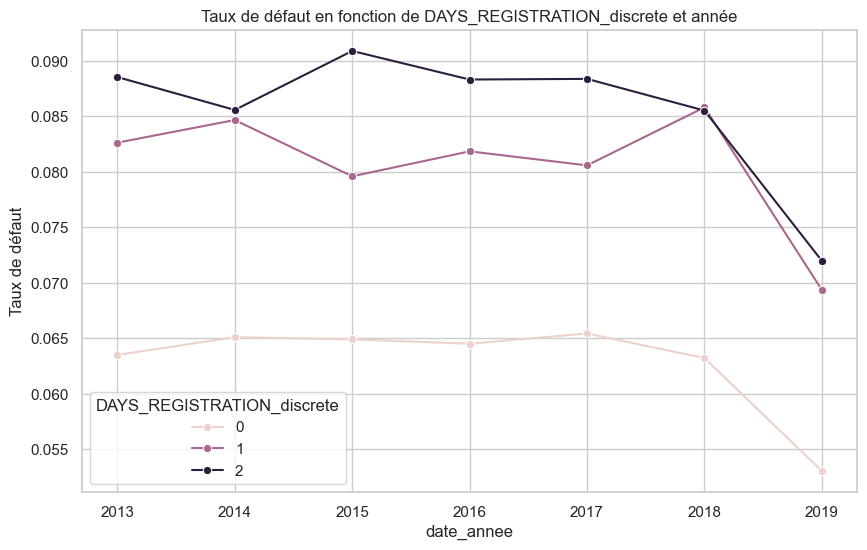

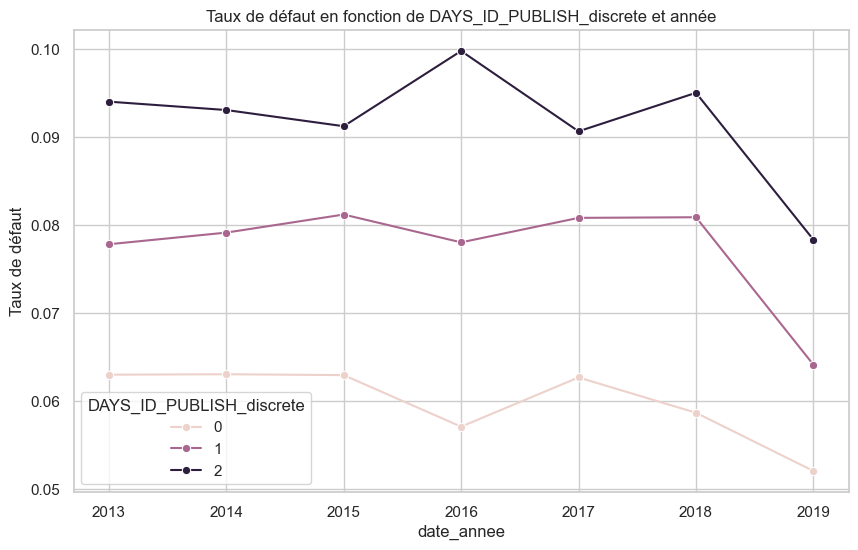

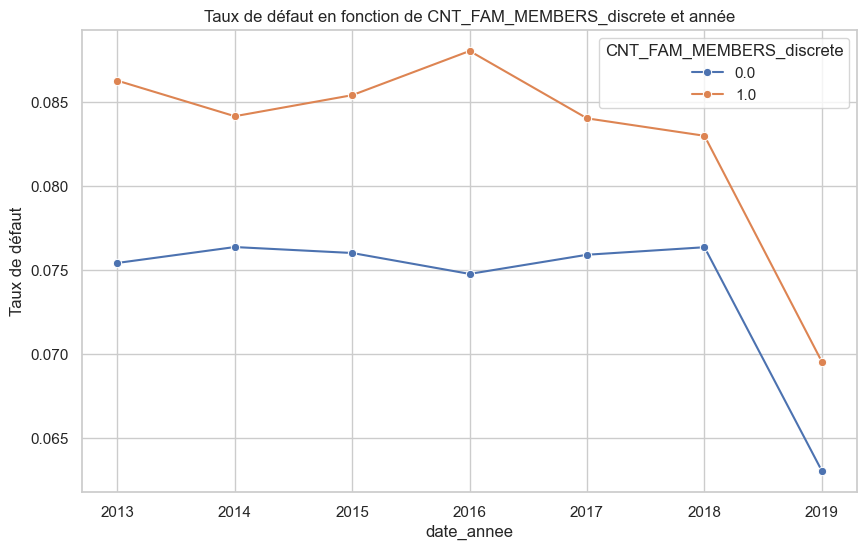

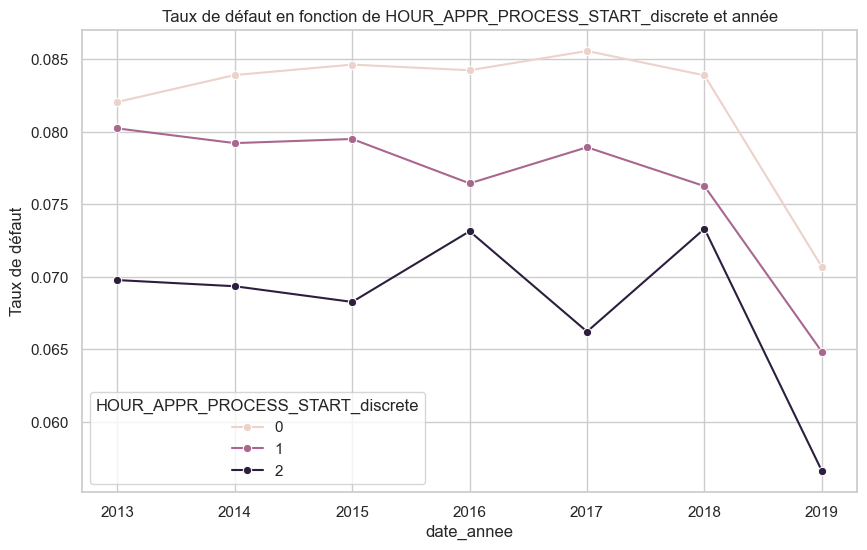

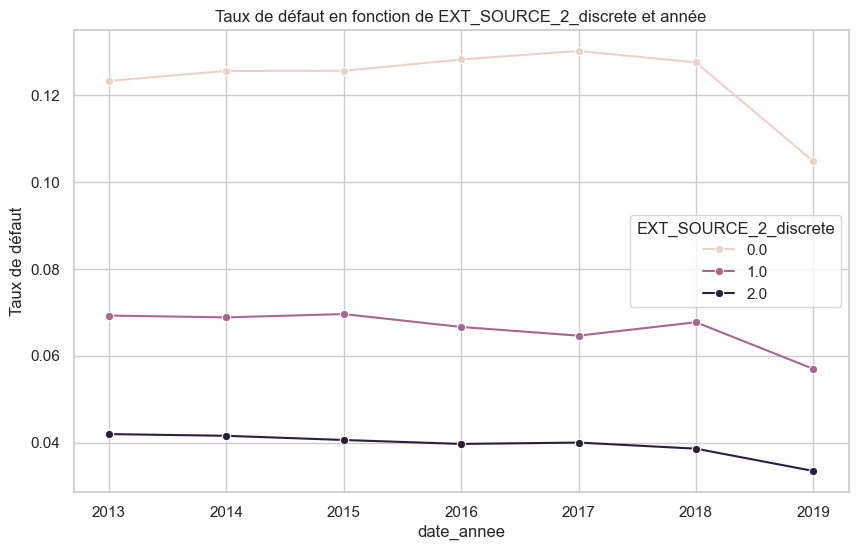

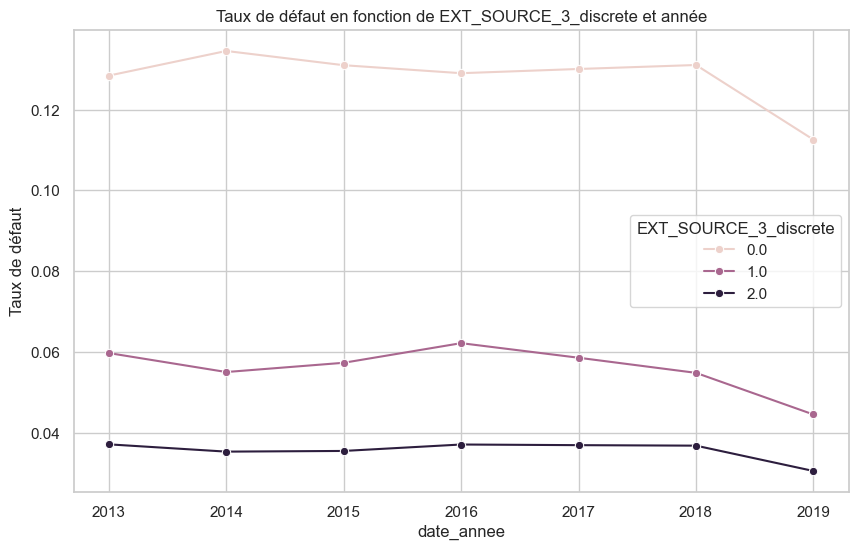

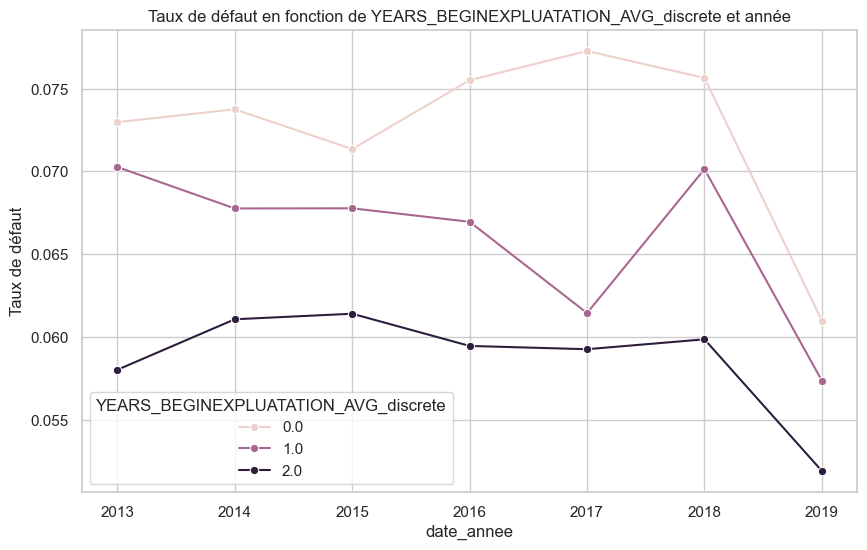

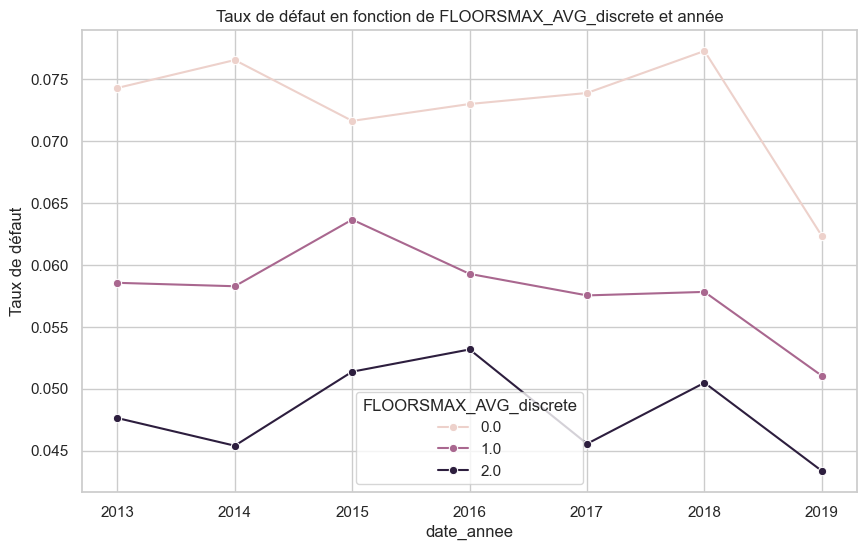

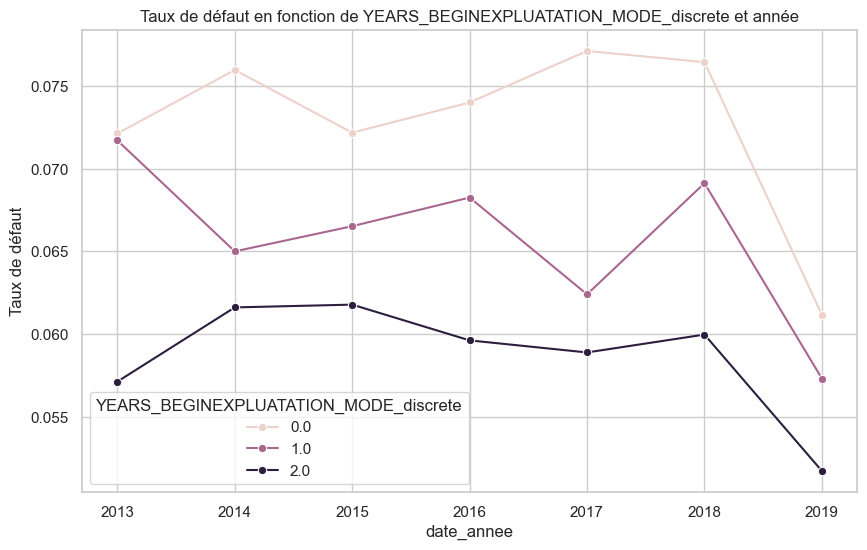

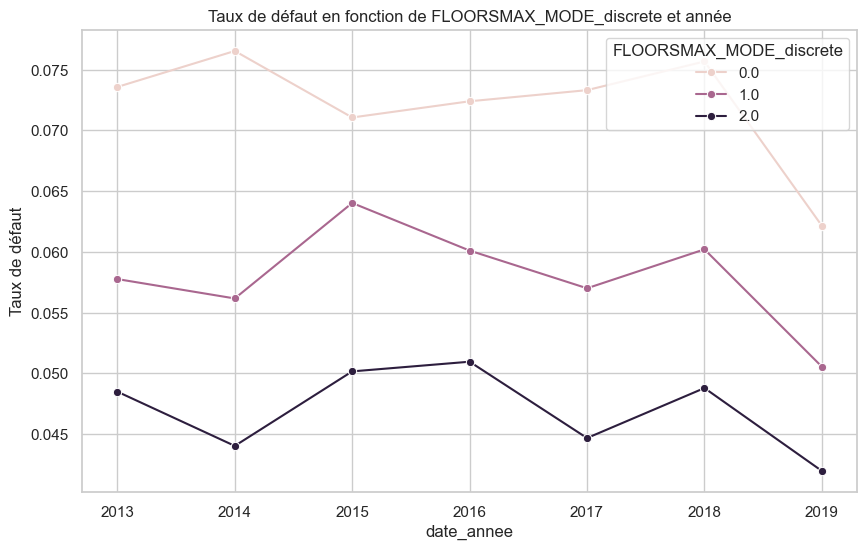

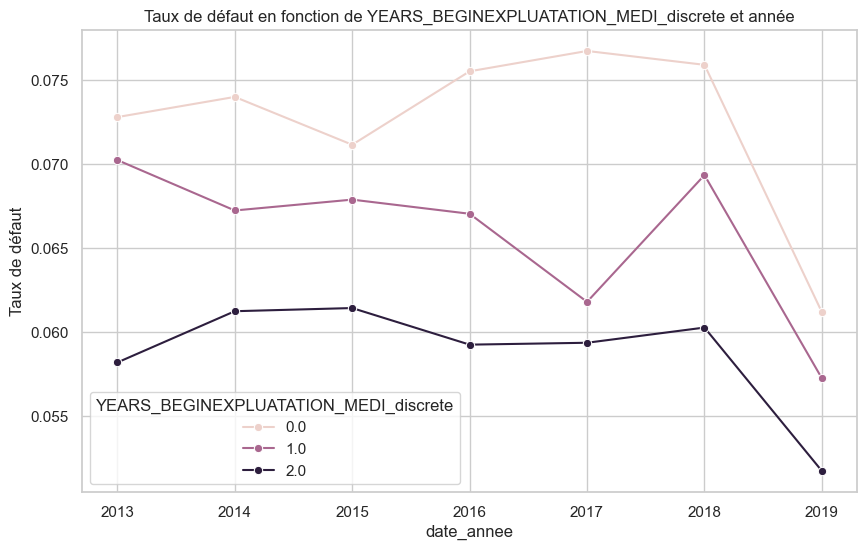

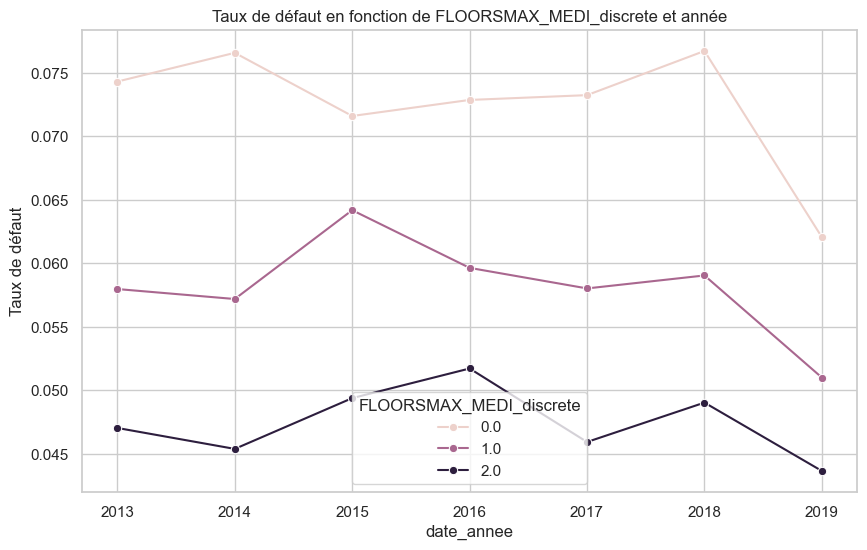

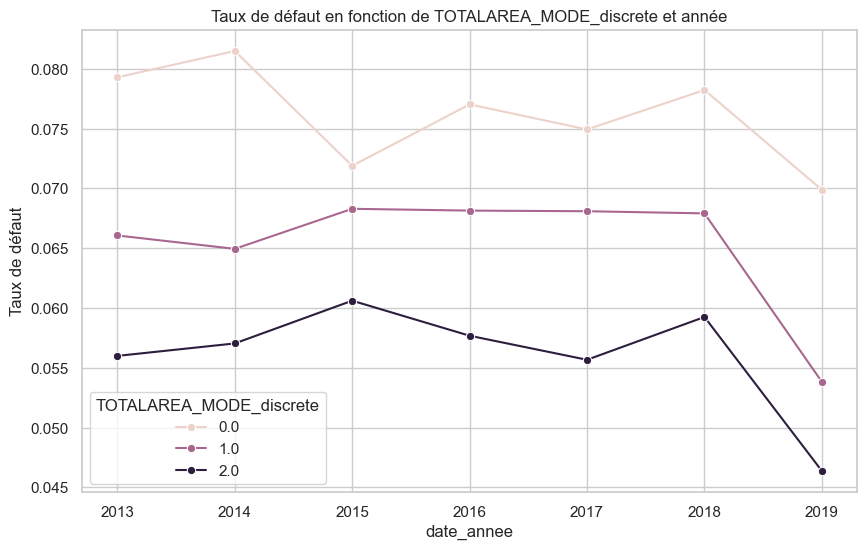

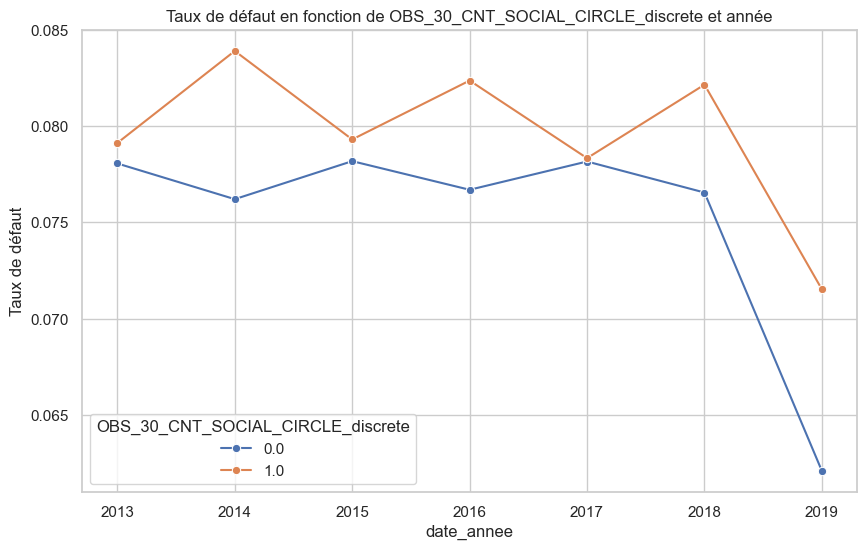

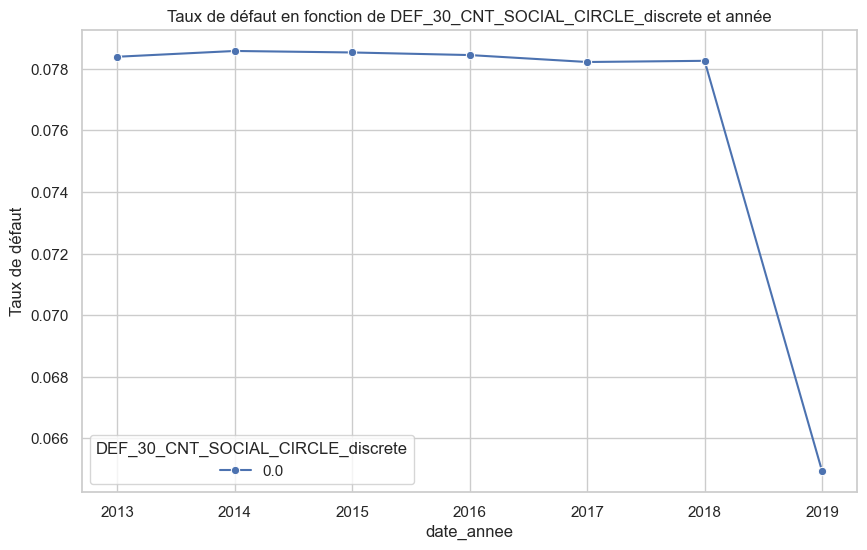

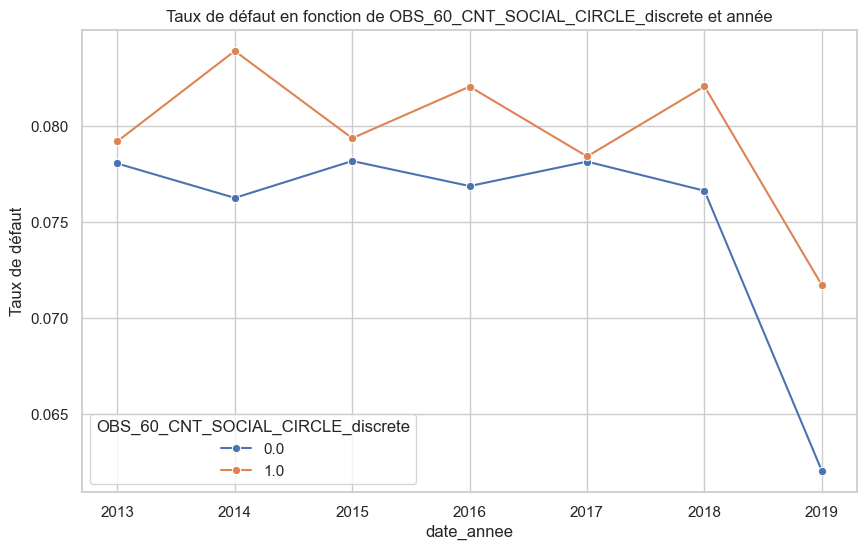

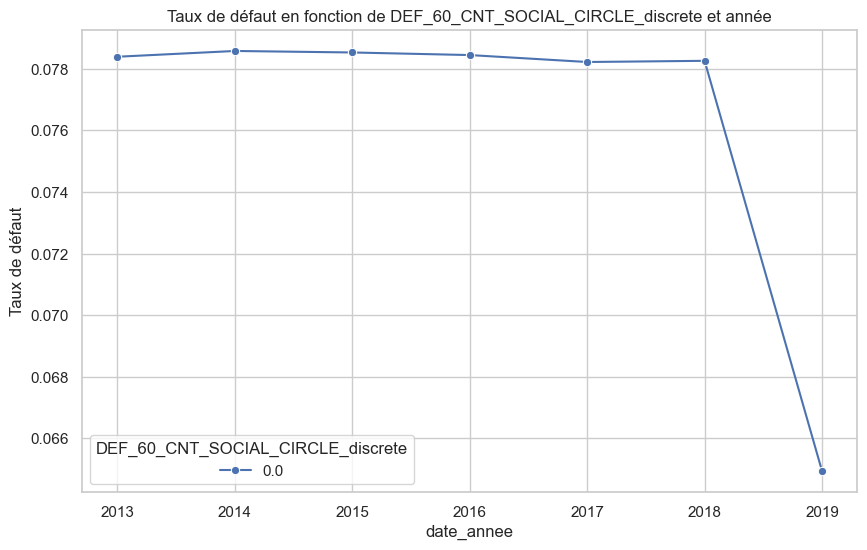

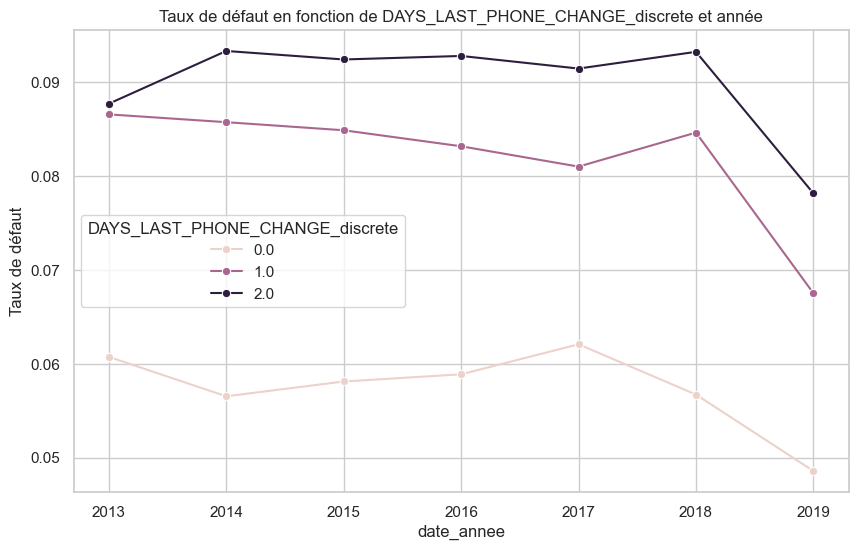

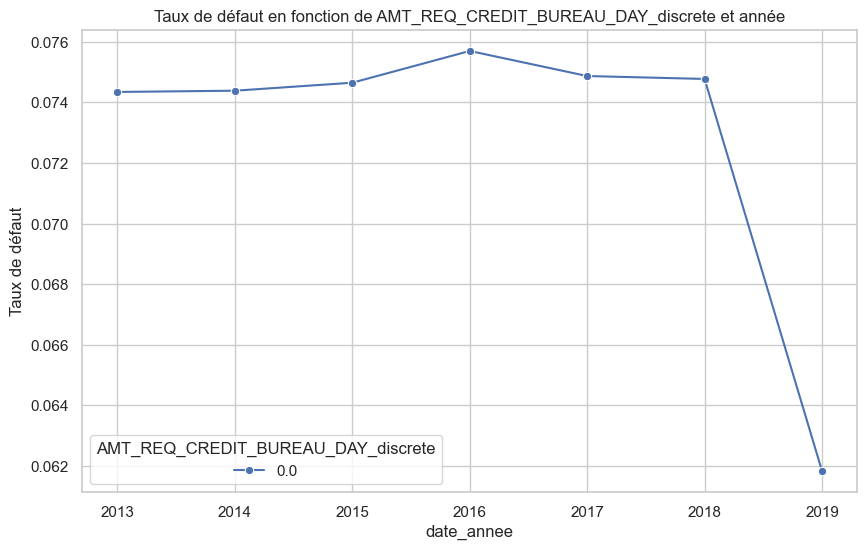

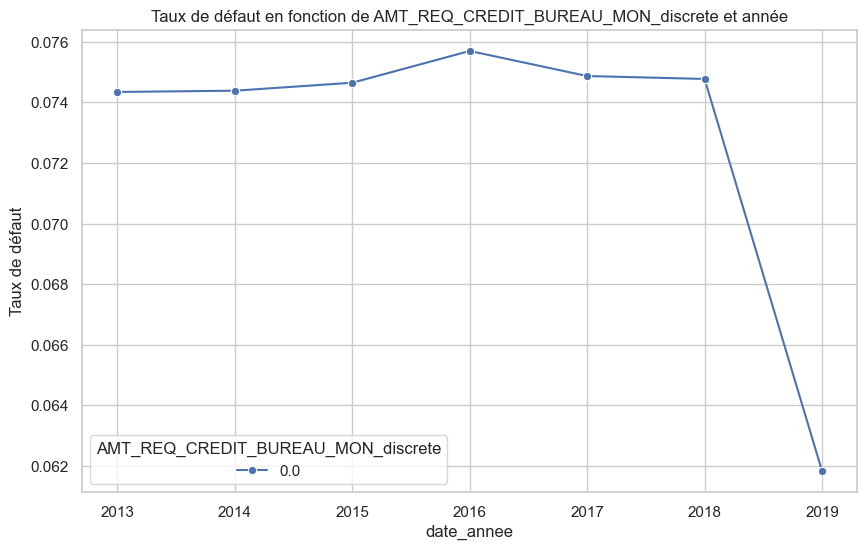

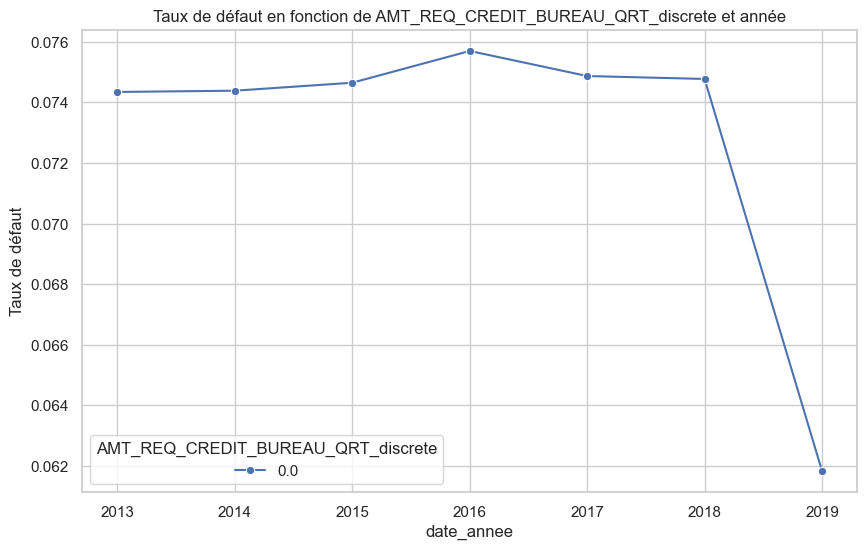

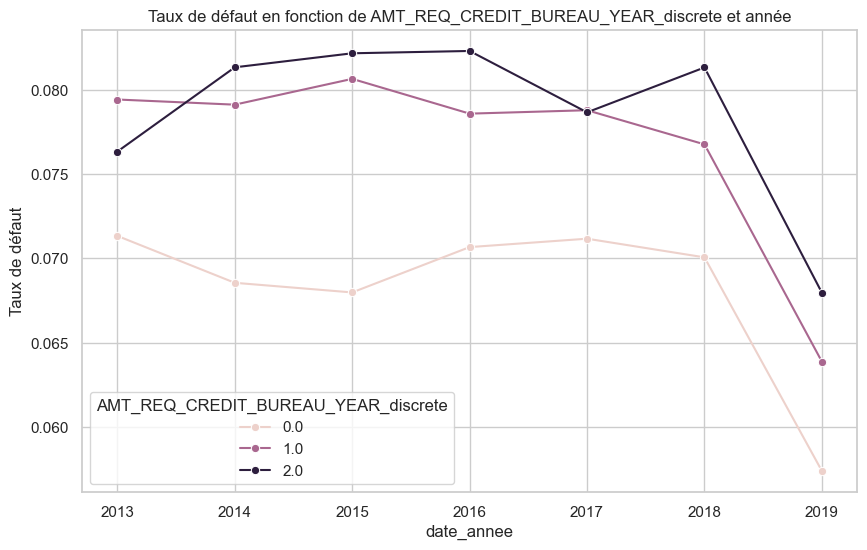

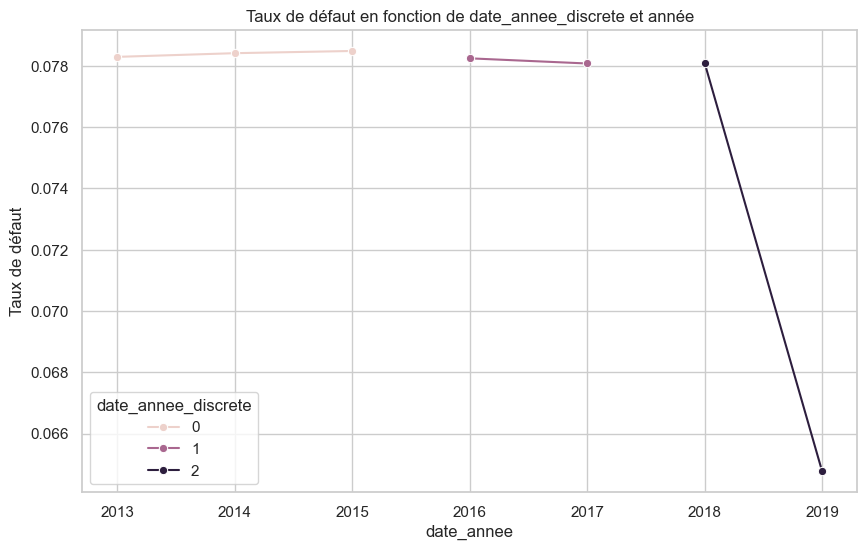

In [110]:
df_discretized = discretize_all_numeric_variables(data, num_bins=3)

In [20]:

def quantile_discretize(data, max_modalities=5):
    result = data.copy()

    for column in data.columns:
        if column in numerical_vars:
            # Calculer les points de coupure basés sur les quantiles
            bins = np.percentile(data[column], np.linspace(0, 100, max_modalities + 1))

            # Discrétiser les valeurs en fonction des quantiles
            result[column] = np.digitize(data[column], bins, right=True)

            # Vérifier le nombre de modalités après discrétisation
            num_modalities = result[column].nunique()

            # Si le nombre de modalités dépasse le maximum, ajuster les groupes
            if num_modalities > max_modalities:
                bins = np.percentile(data[column], np.linspace(0, 100, max_modalities + 1))
                result[column] = np.digitize(data[column], bins, right=True)

    return result


In [ ]:
def discretize_categorical(data, threshold_percentage=5):
    result = data.copy()

    for column in data.columns:
        if column in categorical_vars:
            # Identifier les catégories rares
            rare_categories = data[column].value_counts()[data[column].value_counts() < threshold_percentage].index

            # Remplacer les catégories rares par une catégorie spéciale
            result[column] = np.where(data[column].isin(rare_categories), 'Other', data[column])

    return result

In [21]:
df_discretized_numeric = quantile_discretize(data, max_modalities=5)
df_discretized = discretize_categorical(df_discretized_numeric, threshold_percentage=5)

In [29]:
def calculate_stability_indicator(original_column, discretized_column):
    # Créer une DataFrame avec les colonnes originales et discrétisées
    df_combined = pd.concat([original_column, discretized_column], axis=1, keys=['Original', 'Discretized'])

    # Calculer les proportions observées et attendues
    observed_proportions = df_combined['Discretized'].value_counts(normalize=True).sort_index()
    expected_proportions = df_combined['Original'].value_counts(normalize=True).sort_index()

    # Remplacer les valeurs manquantes par 0 si certaines modalités sont absentes
    observed_proportions = observed_proportions.fillna(0)
    expected_proportions = expected_proportions.fillna(0)

    # Calculer l'indicateur de stabilité
    stability_indicator = np.sum(observed_proportions - expected_proportions * np.log(expected_proportions + 1e-10))

    return stability_indicator

def plot_stability_indicators(original_df, discretized_df):
    stability_indicators = {}

    for column in original_df.columns:
        stability_indicator = calculate_stability_indicator(original_df[column], discretized_df[column])
        stability_indicators[column] = stability_indicator

        # Créer un graphique pour chaque variable
        plt.figure(figsize=(8, 4))
        plt.bar(observed_proportions.index, observed_proportions, alpha=0.5, label='Observé')
        plt.bar(expected_proportions.index, expected_proportions, alpha=0.5, label='Attendu')
        plt.title(f'Indicateur de stabilité : {column}')
        plt.xlabel('Modalités')
        plt.ylabel('Proportion')
        plt.legend()
        plt.show()

    return stability_indicators

In [24]:
def quantile_discretize(data, max_modalities=5):
    result = data.copy()

    stability_indicators = {}

    for column in data.columns:
        if column in numerical_vars:
            # Calculer les points de coupure basés sur les quantiles
            bins = np.percentile(data[column], np.linspace(0, 100, max_modalities + 1))

            # Discrétiser les valeurs en fonction des quantiles
            result[column] = np.digitize(data[column], bins, right=True)

            # Calculer l'indicateur de stabilité
            stability_indicator = calculate_stability_indicator(data[column], result[column])
            stability_indicators[column] = stability_indicator

            # Afficher l'évolution de la répartition par modalités
            plt.figure(figsize=(8, 4))
            plt.hist([data[column], result[column]], bins=bins, alpha=0.5, label=['Original', 'Discretized'])
            plt.title(f'Évolution de la répartition : {column}')
            plt.xlabel('Valeurs')
            plt.ylabel('Fréquence')
            plt.legend()
            plt.show()

    return result, stability_indicators

def calculate_stability_indicator(original_column, discretized_column):
    # Créer une DataFrame avec les colonnes originales et discrétisées
    df_combined = pd.concat([original_column, discretized_column], axis=1, keys=['Original', 'Discretized'])

    # Calculer les proportions observées et attendues
    observed_proportions = df_combined['Discretized'].value_counts(normalize=True).sort_index()
    expected_proportions = df_combined['Original'].value_counts(normalize=True).sort_index()

    # Remplacer les valeurs manquantes par 0 si certaines modalités sont absentes
    observed_proportions = observed_proportions.fillna(0)
    expected_proportions = expected_proportions.fillna(0)

    # Calculer l'indicateur de stabilité
    stability_indicator = np.sum(observed_proportions - expected_proportions * np.log(expected_proportions + 1e-10))

    return stability_indicator

In [27]:
df_discretized, stability_indicators = quantile_discretize(data, max_modalities=5)

# Afficher les indicateurs de stabilité par variable
for variable, indicator in stability_indicators.items():
    print(f"Indicateur de stabilité pour {variable}: {indicator}")

TypeError: quantile_discretize() got an unexpected keyword argument 'date_column'

In [50]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [51]:
def calculate_information_value_from_contingency_table(contingency_table):
    """
    Calculer l'Information Value à partir d'une table de contingence.
    
    Args:
        contingency_table (pd.DataFrame): La table de contingence entre la variable et la target.
        
    Returns:
        float: L'Information Value calculé.
    """
    non_event_rate=contingency_table.iloc[0]/(contingency_table.iloc[0]+contingency_table.iloc[1])
    event_rate=contingency_table.iloc[1]/(contingency_table.iloc[0]+contingency_table.iloc[1])
    iv=0
    if (non_event_rate.min() > 0) & (event_rate.mean() >0) :
        for col in non_event_rate.index:
            iv += (event_rate[col] - non_event_rate[col])*np.log(event_rate[col] / non_event_rate[col])

    return iv

In [52]:
for col in categorical_vars:
    contingency_table = pd.crosstab(data["TARGET"], data[col])
    v_cramer = cramers_v(contingency_table)
    iv=calculate_information_value_from_contingency_table(contingency_table)
    print(f"{col} Cramer's V with target : {v_cramer}")
    print(f"{col} Information Value target : {iv}")
    print(60*"-")

In [53]:
data["FLAG_EMP_PHONE"].value_counts()

FLAG_EMP_PHONE
1    250889
0     55218
Name: count, dtype: int64

In [32]:
def show_risk_stability_overtime(colname:str):
    result = data.groupby([colname, "date_annee"])['TARGET'].value_counts(normalize=True).unstack().fillna(0)[1]

    # Tracer le lineplot
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=result.index.get_level_values("date_annee"), y=result.values, hue=result.index.get_level_values(f"{colname}"), marker='o')

    # Ajouter des étiquettes et un titre
    plt.xlabel('date_annee')
    plt.ylabel('Taux de défaut')
    plt.title(f"Taux de défaut en fonction de {colname} et année")

    # Ajouter une légende
    plt.legend(title=f"{colname}")

    # Afficher le graphique
    plt.show()
    

In [33]:
for colname in categorical_vars:
    result = data.groupby([colname, "date_annee"])['TARGET'].value_counts(normalize=True).unstack().fillna(0)[1]

    # Tracer le lineplot
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=result.index.get_level_values("date_annee"), y=result.values, hue=result.index.get_level_values(f"{colname}"), marker='o')

    # Ajouter des étiquettes et un titre
    plt.xlabel('date_annee')
    plt.ylabel('Taux de défaut')
    plt.title(f"Taux de défaut en fonction de {colname} et année")

    # Ajouter une légende
    plt.legend(title=f"{colname}")

    # Afficher le graphique
    plt.show()

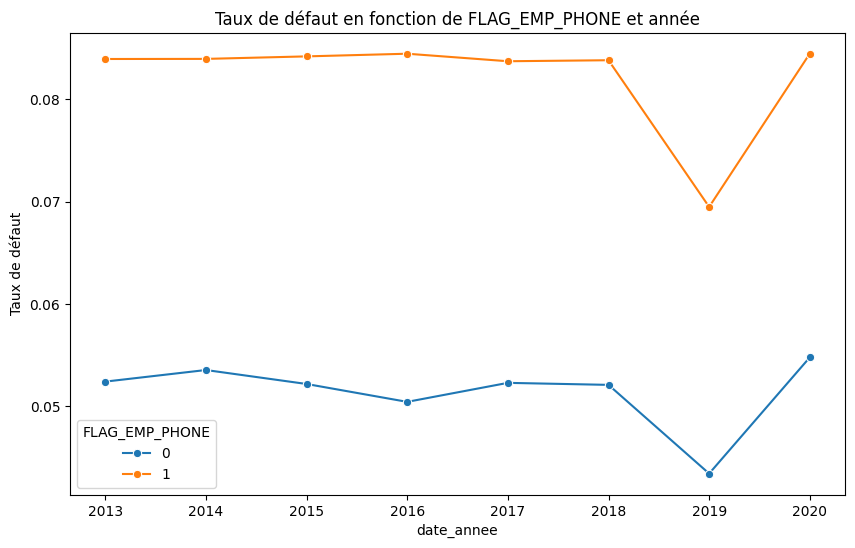

In [34]:
show_risk_stability_overtime("FLAG_EMP_PHONE") # à faire une boucle sur les variables catégorielles